# Разведывательный анализ данных (EDA)

Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind, norm

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

# функция проводящая разведывательный анализ зависимостей двух столбцов


def primary_look(data, column, target, norm_num=30, per=5, pred='two-sided'):
    typ = data[column].dtypes
    if True:
        print(
            f'процент заполненных строк - {round((data[column].count()/len(data[column]))*100, 2)}%')
        # оставляем срез датафрейма без незаполненных строк по текущему столбцу
        data = data[data[column].notnull()]
        display(pd.DataFrame(data[column].value_counts()))
        print('Статистические параметры ', column)
        display(data[column].describe())

        fig = plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        sns.barplot(x=column, y=target, data=data)
        plt.title("Среднее значение ", fontsize=20)

        plt.subplot(1, 2, 2)
        sns.barplot(x=column, y=target, data=data, estimator=np.median)
        plt.title("Медианное значение ", fontsize=20)
        plt.show()

        #plt.subplot(3, 1, 3)
        sns.boxplot(x=column, y=target, data=data)
        plt.title('Статистические параметры ', fontsize=20)
        plt.show()

        list_of_items = data[column].value_counts().index[:10]
        if typ != 'O':  # если столбец числовой
            # сортировка элементов по возрастанию для читабельности вывода
            list_of_items = np.sort(list_of_items)

            fig = plt.figure(figsize=(10, 5))

            plt.subplot(1, 2, 1)
            perc25 = df[target].quantile(0.25)
            perc75 = df[target].quantile(0.75)
            IQR = perc75 - perc25
            df[column].loc[df[column].between(
                perc25 - 1.5*IQR,
                perc75 + 1.5*IQR)].hist(
                alpha=0.5, bins=data[column].nunique(), range=(data[column].min(), data[column].max()), label='IQR')

            df[column].hist(alpha=0.5, bins=data[column].nunique(), range=(
                data[column].min(), data[column].max()), label='весь диапазон')
            plt.legend()
            plt.title('Гистограмма с наложением распределения', fontsize=16)

            plt.subplot(1, 2, 2)
            sns.boxplot(x=data[column])
            plt.title('Распределение', fontsize=20)

            plt.show()

            sns.scatterplot(x=column, y=target, data=data)
            plt.title('Диаграмма рассеивания', fontsize=20)
            plt.show()
            print(
                f'\nКоэффициент корреляции между {column} и {target}: {round(df[column].astype(float).corr(df[target].astype(float)), 2)}\n\n')
        for item in list_of_items:
            if pd.notnull(item):
                X = data[target][data[column] == item]
                #X0 = data[target][(data[column] != item) & (data[column].notnull())]
                X0 = data[target][data[column] != item]
                mean = round(X.mean(), 2)
                median = round(X.median(), 2)
                std = round(X.astype(float).std(), 2)
                print(
                    f'{item} :\tкол-во записей - {data[column].value_counts()[item]}; процент от группы - {round((data[column].value_counts()[item]/data[column].count())*100, 2)}%;')
                print(
                    f'\tсреднее : {mean}, разница с общим : {round(mean-data[target].mean(), 2)};')
                print(
                    f'\tмедиана : {median}, разница с общим : {round(median-data[target].median(), 2)};')
                print(
                    f'\tотклонение : {std}, разница с общим : {round(std-data[target].std(), 2)};\n')
                print(
                    f'Статистическая оценка влияния параметра {item} признака {column}:\n')
                # if (data[column].value_counts()[item] >= norm_num) and :
                if (len(X) >= norm_num) and (len(X0) >= norm_num):
                    tstat, pvalue = ttest_ind(
                        X, X0, equal_var=False, alternative=pred)
                    print(
                        f'Т статистика = {round(tstat, 2)}; P-value = {round(pvalue, 2)};')
                    if pvalue > per*0.01:
                        vl = 'НЕ влияет'
                    else:
                        vl = 'ИМЕЕТ ВЛИЯНИЕ'
                    print(
                        f'таким образом на {per}% уровне значимости: {item} {vl} на {target}\n\n')
                else:
                    print(
                        f'одна из выборок слишком мала (< {norm_num}) невозможно оценить влияние.\n\n')
        if data[column].nunique() > 10:
            print('значений больше 10, было выведено 10 наиболее часто встречающихся')


# функция показывающая зависимости по множественным гипотезам внутри одного столбца
def get_stat_dif(data, column, target):
    cols = data.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], target],
                     data.loc[data.loc[:, column] == comb[1], target]).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


# функция показывающая произошло ли качественное изменение распределения пропорции
def prop_diff(data_o, data_n, norm_num=5, per=5, info=True):
    data_o = data_o[data_o.notnull()]
    data_n = data_n[data_n.notnull()]
    for attribute in data_o.unique():
        if info:
            print(f'проверка для {attribute} из столбца {data_o.name}:')
        n_o = data_o.count()
        n_n = data_n.count()
        p_o = (data_o.value_counts()[attribute]/n_o)
        if (p_o*n_o >= norm_num) and ((1 - p_o)*n_o >= norm_num) and (p_o*n_n >= 5) and ((1 - p_o)*n_n >= 5):
            if attribute in data_n.unique():
                p_n = data_n.value_counts()[attribute]/n_n
            else:
                p_n = 0
            p = (p_o*n_o + p_n*n_n)/(n_o + n_n)
            Z = (p_o - p_n)/(math.sqrt(p*(1-p)) * math.sqrt(1/n_o + 1/n_n))
            if norm.cdf(Z) <= per/100:
                print(
                    f'для {attribute} из {data_o.name} ОБНАРУЖИЛИСЬ значимые изменения:\nобщее: {round(p_o, 3)}\tпроверяемое: {round(p_n, 3)}\n')
            else:
                if info:
                    print(
                        f'для {attribute} значимых изменений нет:\n:общее {round(p_o, 3)}\tпроверяемое: {round(p_n, 3)}\n')
        else:
            if info:
                print(
                    f'условия достаточные для определения изменения распределения {attribute} не выполнены (малые выборки)\n')


# функция возвращает ключевые параметры нормального распределения величины, либо обрезает величину по доверительному интервалу
def outers_intervals(column, strim=False):
    perc25 = column.quantile(0.25)
    perc75 = column.quantile(0.75)
    IQR = perc75 - perc25
    if strim:
        return column.loc[column.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
    return [column.min(), perc25 - 1.5*IQR, perc25, column.mean(), perc75, perc75 + 1.5*IQR, column.max()]

----

In [2]:
df = pd.read_csv('stud_math.csv')

In [3]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
#df[['age', 'failures', 'Medu', 'Fedu', 'traveltime', 'studytime', 
#    'studytime, granular', 'famrel', 'freetime', 
#    'goout', 'health', 'absences','score']] = df[['age', 'failures', 'Medu', 'Fedu', 
#                                                  'traveltime', 'studytime', 'studytime, granular', 'famrel', 
#                                                  'freetime', 'goout', 'health', 'absences', 'score']].astype('Int64')

создадим список столбцов, которые подойдут для создания модели (колонка score в него точно войдет):

In [6]:
list_mask = ['score']

# score

Стоит разобраться с основным оценочным столбцом - баллом за госэкзамен по математике

In [7]:
display(df['score'].value_counts())
print(df['score'].describe())
df[df['score'].isnull()]

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     31
40.0     31
45.0     27
70.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
20.0      1
100.0     1
Name: score, dtype: int64

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,-6.0,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,-9.0,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,-6.0,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


Как видно, есть не заполненные поля, которые совершенно не нужны при анализе, от них стоит избавиться.

In [8]:
df = df[df['score'].notnull()]
df = df.reset_index()
df = df.drop(columns = 'index')
display(df)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
385,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
386,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
387,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Взглянем на гистограмму распределения оценок

<AxesSubplot:>

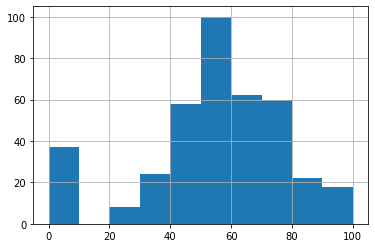

In [9]:
df.score.hist()

Стоит проверить есть ли выбросы, так же странным выглядит достаточно большое кол-во человек с оценкой 0. Достаточно странно, что в распределении нет промежуточных значений между 0 и 20. Если убрать оценки 0, гистограмма будет больше похожа на нормальное распределение. К тому же, с точки зрения здравого смысла, не ясно возможно ли получения 0 на экзамене.

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


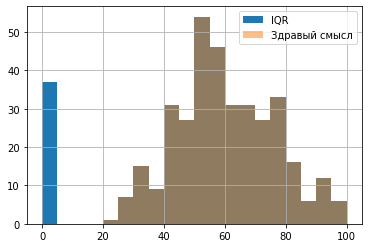

In [10]:
IQR = df['score'].quantile(0.75) - df['score'].quantile(0.25)
perc25 = df['score'].quantile(0.25)
perc75 = df['score'].quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
df.score.loc[df.score.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 20, range = (0, 100), label = 'IQR')
 
df.score.loc[df.score > 0].hist(
alpha = 0.5, bins = 20, range = (0, 100), label = 'Здравый смысл')
 
plt.legend();

С учетом выше сказанного, показалось целесообразным, для дальнейшего анализа использовать оценки больше 0.

Однако, на всякий случай, сохраним срез DataFrame с оценками 0 в отделный DataFrame, возможно, сделаем его анализ отдельно.

In [11]:
df_original = df.copy()
df_0 = df[df['score'] == 0]
df = df[df['score'] > 0]
df = df.reset_index()
df = df.drop(columns = 'index')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
348,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
349,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
350,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


В итоге получаем такие статичтические показатели основной оценки:

In [12]:
print(df['score'].describe())

count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


<AxesSubplot:>

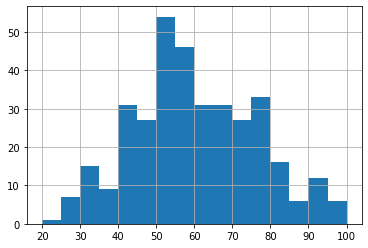

In [13]:
df['score'].hist(bins = 16, range = (20, 100), label = 'last')

<AxesSubplot:xlabel='score'>

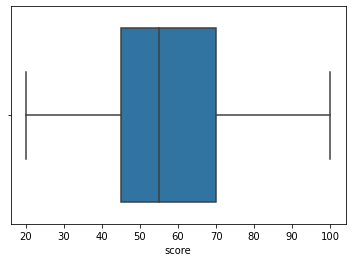

In [14]:
sns.boxplot(x = df['score'])

Можно приступать к разведывательному анализу остальных столбцов.

-------------------------------------

Для начала проверим корреляцию между числовыми столбцами

In [15]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.122979,-0.121617,0.095370,-0.011426,0.235875,0.011426,0.074152,0.004837,0.123638,-0.056173,0.112599,-0.131542
Medu,-0.122979,1.000000,0.247339,-0.165394,0.070533,-0.205944,-0.070533,-0.000958,0.021002,0.080556,-0.038050,-0.027377,0.186477
Fedu,-0.121617,0.247339,1.000000,0.042074,0.049060,-0.141995,-0.049060,0.049613,-0.071328,-0.026507,0.025874,0.000245,0.069842
traveltime,0.095370,-0.165394,0.042074,1.000000,-0.101490,0.091757,0.101490,-0.023920,-0.023067,0.029374,-0.000092,-0.047560,-0.075516
studytime,-0.011426,0.070533,0.049060,-0.101490,1.000000,-0.156406,-1.000000,0.063856,-0.128661,-0.029686,-0.085469,-0.030187,0.142055
failures,0.235875,-0.205944,-0.141995,0.091757,-0.156406,1.000000,0.156406,-0.011414,0.127391,0.126770,0.064083,0.089541,-0.289377
"studytime, granular",0.011426,-0.070533,-0.049060,0.101490,-1.000000,0.156406,1.000000,-0.063856,0.128661,0.029686,0.085469,0.030187,-0.142055
famrel,0.074152,-0.000958,0.049613,-0.023920,0.063856,-0.011414,-0.063856,1.000000,0.162283,0.050751,0.096471,-0.089609,0.046717
freetime,0.004837,0.021002,-0.071328,-0.023067,-0.128661,0.127391,0.128661,0.162283,1.000000,0.296392,0.072729,0.007748,-0.012457
goout,0.123638,0.080556,-0.026507,0.029374,-0.029686,0.126770,0.029686,0.050751,0.296392,1.000000,-0.010343,-0.050616,-0.182286


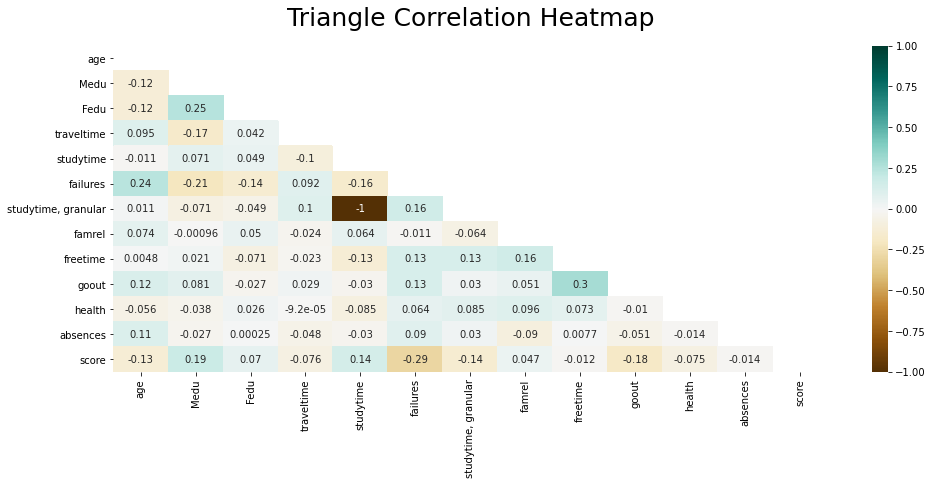

In [16]:
plt.figure(figsize=(16, 6)) 

# Определите маску, чтобы установить значения в верхнем треугольнике на True 
mask = np.triu(np.ones_like(df.corr(), dtype=bool)) 
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
plt.title('Triangle Correlation Heatmap', fontsize = 25, pad=20);


Явных зависимостей у оценки ("score") нет, но "studytime" обратно пропорционален "studytime,granular", соответственно от одного из них можно избавиться, избавляемся от "studytime,granular", т.к. на "studytime" имеется описание

In [17]:
df = df.drop(columns = 'studytime, granular')

--------------------------

# school

school — аббревиатура школы, в которой учится ученик

процент заполненных строк - 100.0%


,school
GP,311
MS,41


Статистические параметры  school


count     352
unique      2
top        GP
freq      311
Name: school, dtype: object

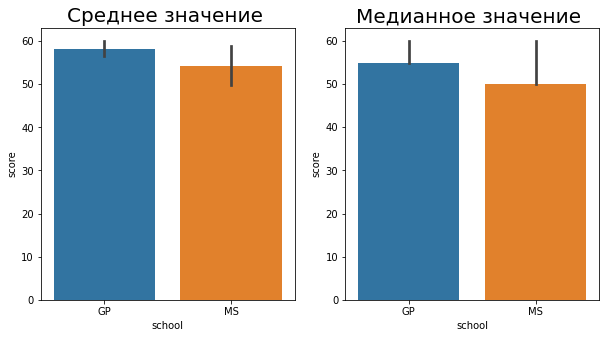

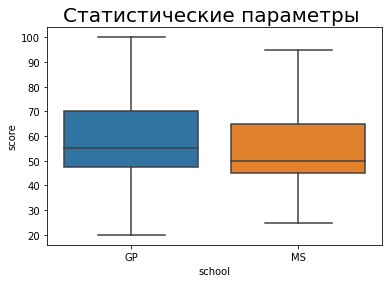

GP :	кол-во записей - 311; процент от группы - 88.35%;
	среднее : 58.22, разница с общим : 0.46;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 16.28, разница с общим : 0.08;

Статистическая оценка влияния параметра GP признака school:

Т статистика = 1.54; P-value = 0.13;
таким образом на 5% уровне значимости: GP НЕ влияет на score


MS :	кол-во записей - 41; процент от группы - 11.65%;
	среднее : 54.27, разница с общим : -3.49;
	медиана : 50.0, разница с общим : -5.0;
	отклонение : 15.31, разница с общим : -0.89;

Статистическая оценка влияния параметра MS признака school:

Т статистика = -1.54; P-value = 0.13;
таким образом на 5% уровне значимости: MS НЕ влияет на score




In [18]:
primary_look(df, 'school', 'score')

Исходя из статистических данных нельзя с уверенностью сказать, что существует зависимость между итоговой оценкой и школой, в которую ходит ученик.
    
    S-

---------------------------

# sex

sex — пол ученика ('F' - женский, 'M' - мужской)

процент заполненных строк - 100.0%


,sex
F,182
M,170


Статистические параметры  sex


count     352
unique      2
top         F
freq      182
Name: sex, dtype: object

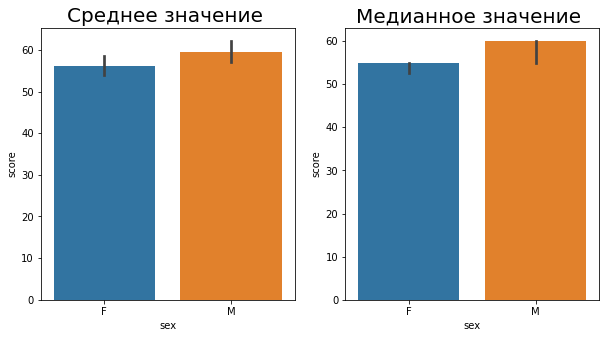

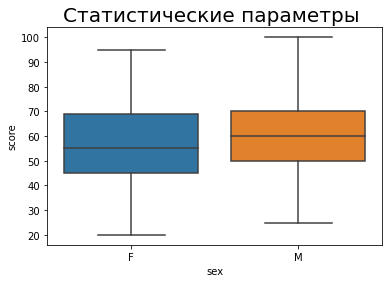

F :	кол-во записей - 182; процент от группы - 51.7%;
	среднее : 56.15, разница с общим : -1.61;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 15.97, разница с общим : -0.23;

Статистическая оценка влияния параметра F признака sex:

Т статистика = -1.93; P-value = 0.06;
таким образом на 5% уровне значимости: F НЕ влияет на score


M :	кол-во записей - 170; процент от группы - 48.3%;
	среднее : 59.47, разница с общим : 1.71;
	медиана : 60.0, разница с общим : 5.0;
	отклонение : 16.32, разница с общим : 0.12;

Статистическая оценка влияния параметра M признака sex:

Т статистика = 1.93; P-value = 0.06;
таким образом на 5% уровне значимости: M НЕ влияет на score




In [19]:
primary_look(df, 'sex', 'score')

Исходя из статистических данных нельзя с уверенностью сказать, что существует зависимость между итоговой оценкой и школой, в которую ходит ученик. Хотя на 10% уровне значимости вывод будет обратным! Так и до обвинений в дискриминации не долго...
    
    S-

----------------

# age

age — возраст ученика (от 15 до 22)

процент заполненных строк - 100.0%


,age
16,96
17,90
15,76
18,69
19,16
20,3
21,1
22,1


Статистические параметры  age


count    352.000000
mean      16.633523
std        1.256011
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

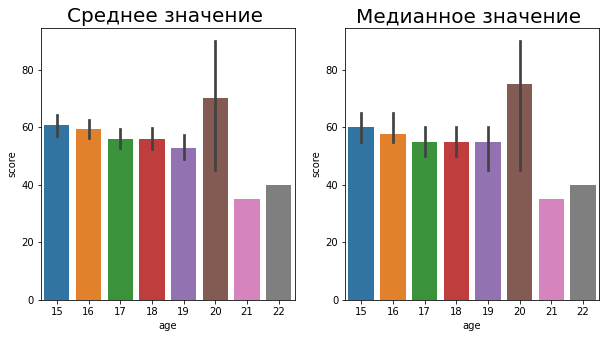

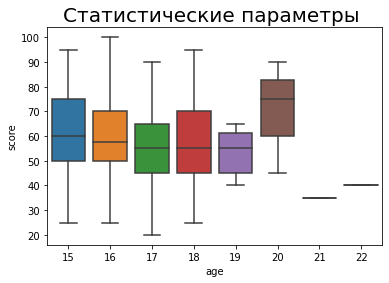

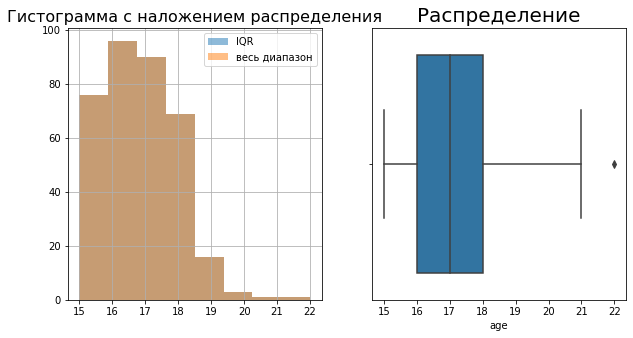

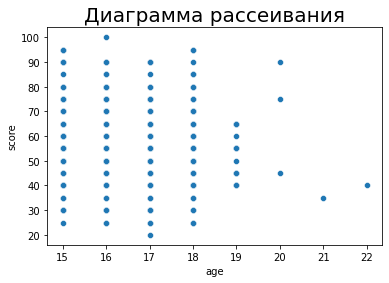


Коэффициент корреляции между age и score: -0.13


15 :	кол-во записей - 76; процент от группы - 21.59%;
	среднее : 60.72, разница с общим : 2.96;
	медиана : 60.0, разница с общим : 5.0;
	отклонение : 17.24, разница с общим : 1.04;

Статистическая оценка влияния параметра 15 признака age:

Т статистика = 1.72; P-value = 0.09;
таким образом на 5% уровне значимости: 15 НЕ влияет на score


16 :	кол-во записей - 96; процент от группы - 27.27%;
	среднее : 59.22, разница с общим : 1.46;
	медиана : 57.5, разница с общим : 2.5;
	отклонение : 16.0, разница с общим : -0.2;

Статистическая оценка влияния параметра 16 признака age:

Т статистика = 1.05; P-value = 0.3;
таким образом на 5% уровне значимости: 16 НЕ влияет на score


17 :	кол-во записей - 90; процент от группы - 25.57%;
	среднее : 55.94, разница с общим : -1.82;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 15.59, разница с общим : -0.61;

Статистическая оценка влияния параметра 17 признака age:

Т статистика = -1.26; P-value

In [20]:
primary_look(df, 'age', 'score')

Столбец age цивровой, но имеет дискретные значения, и поэтому может быть обработан так же как и номинативные столбцы. Просто были добавлены некоторые графики и подсчет корреляции. Как видно из анализа, похоже что зависимости нет. Хотя визуально прослеживается тенденция к ухудшению оценки и корреляция на уровне 0,13. Возможно это связано с пересдачами (т.е. если человек старше, то, скорее всего, он уже пытался сдавать экзамен раньше, но завалил его).
    
    N+

In [21]:
list_mask.append('age')

----------

# address

address — тип адреса ученика ('U' - городской, 'R' - за городом)

процент заполненных строк - 96.02%


,address
U,265
R,73


Статистические параметры  address


count     338
unique      2
top         U
freq      265
Name: address, dtype: object

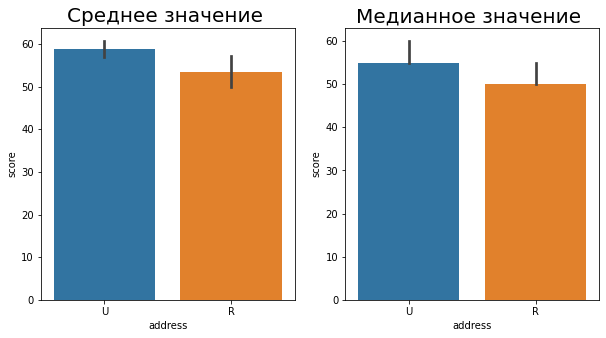

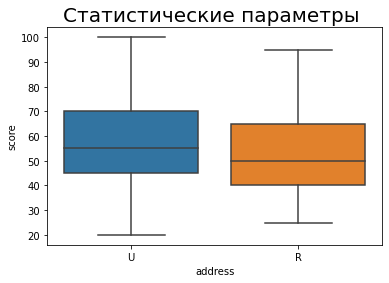

U :	кол-во записей - 265; процент от группы - 78.4%;
	среднее : 58.83, разница с общим : 1.18;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 16.18, разница с общим : -0.14;

Статистическая оценка влияния параметра U признака address:

Т статистика = 2.56; P-value = 0.01;
таким образом на 5% уровне значимости: U ИМЕЕТ ВЛИЯНИЕ на score


R :	кол-во записей - 73; процент от группы - 21.6%;
	среднее : 53.36, разница с общим : -4.29;
	медиана : 50.0, разница с общим : -5.0;
	отклонение : 16.2, разница с общим : -0.12;

Статистическая оценка влияния параметра R признака address:

Т статистика = -2.56; P-value = 0.01;
таким образом на 5% уровне значимости: R ИМЕЕТ ВЛИЯНИЕ на score




In [22]:
primary_look(df, 'address', 'score')

Этот параметр влияет на итоговую оценку.

    S+

In [23]:
list_mask.append('address')

--------------------

# famsize

famsize — размер семьи('LE3' <= 3, 'GT3' >3)

процент заполненных строк - 93.18%


,famsize
GT3,228
LE3,100


Статистические параметры  famsize


count     328
unique      2
top       GT3
freq      228
Name: famsize, dtype: object

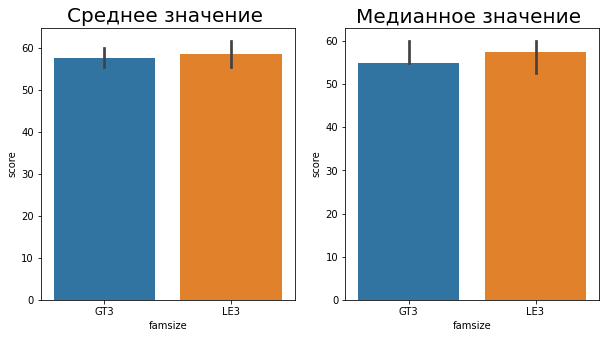

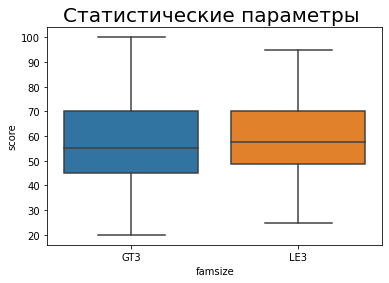

GT3 :	кол-во записей - 228; процент от группы - 69.51%;
	среднее : 57.61, разница с общим : -0.27;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 16.1, разница с общим : -0.01;

Статистическая оценка влияния параметра GT3 признака famsize:

Т статистика = -0.46; P-value = 0.65;
таким образом на 5% уровне значимости: GT3 НЕ влияет на score


LE3 :	кол-во записей - 100; процент от группы - 30.49%;
	среднее : 58.5, разница с общим : 0.62;
	медиана : 57.5, разница с общим : 2.5;
	отклонение : 16.2, разница с общим : 0.09;

Статистическая оценка влияния параметра LE3 признака famsize:

Т статистика = 0.46; P-value = 0.65;
таким образом на 5% уровне значимости: LE3 НЕ влияет на score




In [24]:
primary_look(df, 'famsize', 'score')

Здесь явно нет никакого влияния - от этого столбца смело можно избавляться.

    S-

-------------

# Pstatus

Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

процент заполненных строк - 88.35%


,Pstatus
T,277
A,34


Статистические параметры  Pstatus


count     311
unique      2
top         T
freq      277
Name: Pstatus, dtype: object

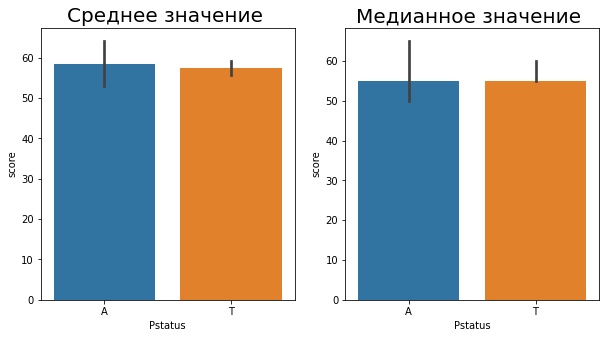

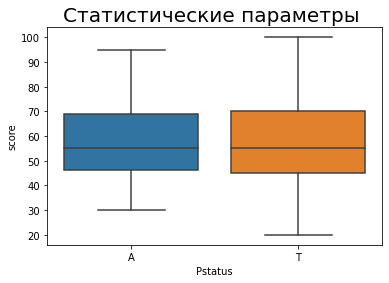

T :	кол-во записей - 277; процент от группы - 89.07%;
	среднее : 57.49, разница с общим : -0.1;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 15.91, разница с общим : -0.24;

Статистическая оценка влияния параметра T признака Pstatus:

Т статистика = -0.27; P-value = 0.79;
таким образом на 5% уровне значимости: T НЕ влияет на score


A :	кол-во записей - 34; процент от группы - 10.93%;
	среднее : 58.38, разница с общим : 0.79;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 18.25, разница с общим : 2.1;

Статистическая оценка влияния параметра A признака Pstatus:

Т статистика = 0.27; P-value = 0.79;
таким образом на 5% уровне значимости: A НЕ влияет на score




In [25]:
primary_look(df, 'Pstatus', 'score')

Несмотря на то, что семьи с раздельным проживанием родителей считаются менее благополучными, нет никакого влияния - от этого столбца можно избавляться. 

    S-

--------

# Medu

Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
Столбец числовой, но параметр качественный, поэтому используем стандартный анализ.

процент заполненных строк - 99.43%


,Medu
4.0,125
2.0,88
3.0,87
1.0,47
0.0,3


Статистические параметры  Medu


count    350.000000
mean       2.811429
std        1.091192
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

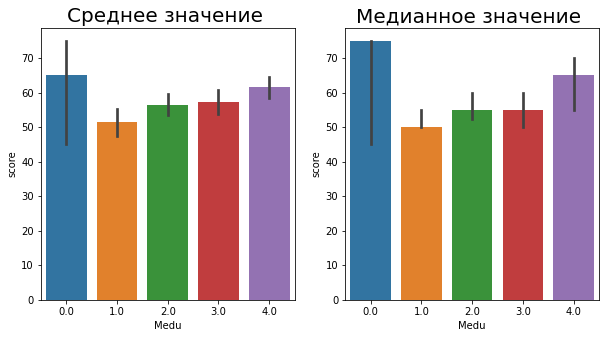

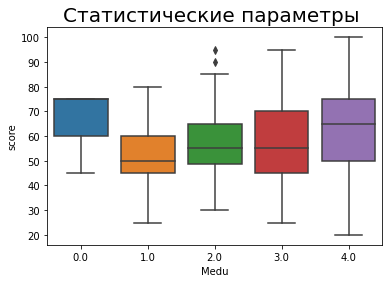

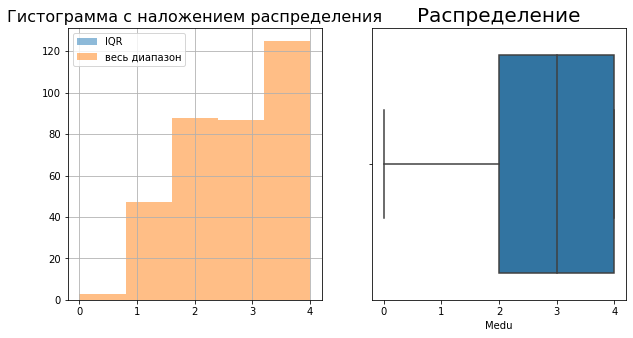

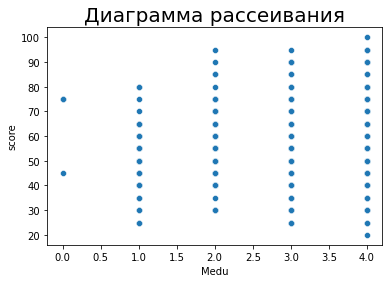


Коэффициент корреляции между Medu и score: 0.19


0.0 :	кол-во записей - 3; процент от группы - 0.86%;
	среднее : 65.0, разница с общим : 7.14;
	медиана : 75.0, разница с общим : 20.0;
	отклонение : 17.32, разница с общим : 1.15;

Статистическая оценка влияния параметра 0.0 признака Medu:

одна из выборок слишком мала (< 30) невозможно оценить влияние.


1.0 :	кол-во записей - 47; процент от группы - 13.43%;
	среднее : 51.38, разница с общим : -6.48;
	медиана : 50.0, разница с общим : -5.0;
	отклонение : 12.76, разница с общим : -3.41;

Статистическая оценка влияния параметра 1.0 признака Medu:

Т статистика = -3.58; P-value = 0.0;
таким образом на 5% уровне значимости: 1.0 ИМЕЕТ ВЛИЯНИЕ на score


2.0 :	кол-во записей - 88; процент от группы - 25.14%;
	среднее : 56.36, разница с общим : -1.5;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 13.74, разница с общим : -2.43;

Статистическая оценка влияния параметра 2.0 признака Medu:

Т статистика = -1.11; P-value = 0.27;
таким обр

In [26]:
primary_look(df, 'Medu', 'score')

Образование матери оказывает влияние на полученную в итоге оценку. Причем чем лучше образование, тем лучше и оценка (кто бы мог подумать).

    N+

In [27]:
list_mask.append('Medu')

-----------------------

# Fedu

Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
все полностью аналогично предыдущему столбцу.

процент заполненных строк - 94.03%


,Fedu
2.0,94
3.0,89
4.0,80
1.0,65
0.0,2
40.0,1


Статистические параметры  Fedu


count    331.000000
mean       2.658610
std        2.324066
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

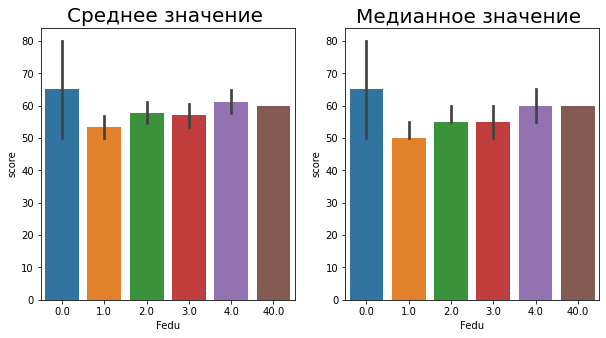

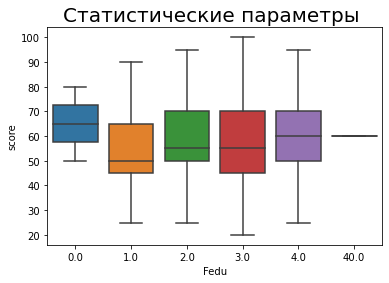

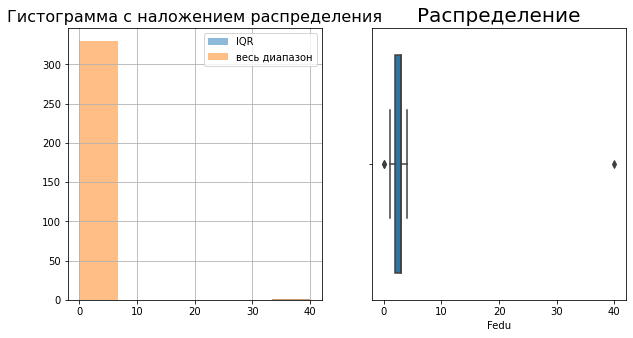

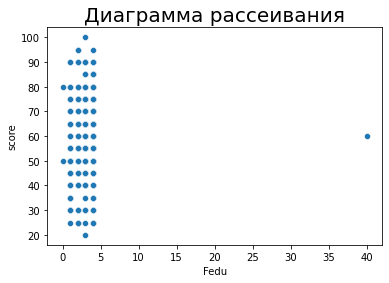


Коэффициент корреляции между Fedu и score: 0.07


0.0 :	кол-во записей - 2; процент от группы - 0.6%;
	среднее : 65.0, разница с общим : 7.36;
	медиана : 65.0, разница с общим : 10.0;
	отклонение : 21.21, разница с общим : 5.18;

Статистическая оценка влияния параметра 0.0 признака Fedu:

одна из выборок слишком мала (< 30) невозможно оценить влияние.


1.0 :	кол-во записей - 65; процент от группы - 19.64%;
	среднее : 53.46, разница с общим : -4.18;
	медиана : 50.0, разница с общим : -5.0;
	отклонение : 15.08, разница с общим : -0.95;

Статистическая оценка влияния параметра 1.0 признака Fedu:

Т статистика = -2.46; P-value = 0.02;
таким образом на 5% уровне значимости: 1.0 ИМЕЕТ ВЛИЯНИЕ на score


2.0 :	кол-во записей - 94; процент от группы - 28.4%;
	среднее : 57.82, разница с общим : 0.18;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 15.74, разница с общим : -0.29;

Статистическая оценка влияния параметра 2.0 признака Fedu:

Т статистика = 0.13; P-value = 0.9;
таким образо

In [28]:
primary_look(df, 'Fedu', 'score')

в наборе данных присутствует аномальное значение, которого не должно быть, значения с 0 слишком малы по кол-ву чтобы их учитывать:

In [29]:
df['Fedu'] = df['Fedu'].apply(lambda x: None if (x > 4) or (x ==0) else x)

проведем анализ повторно:

процент заполненных строк - 93.18%


,Fedu
2.0,94
3.0,89
4.0,80
1.0,65


Статистические параметры  Fedu


count    328.000000
mean       2.560976
std        1.064840
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

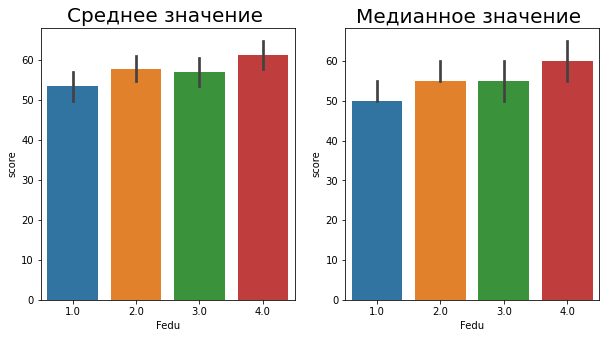

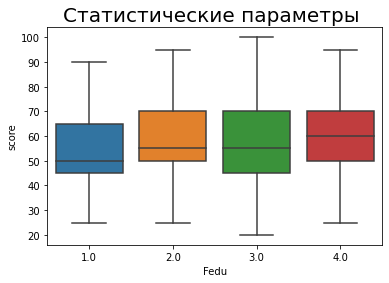

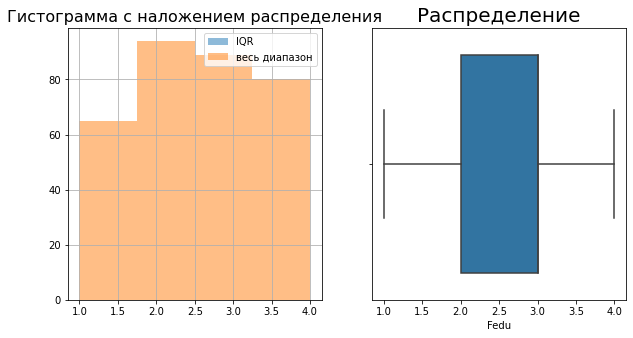

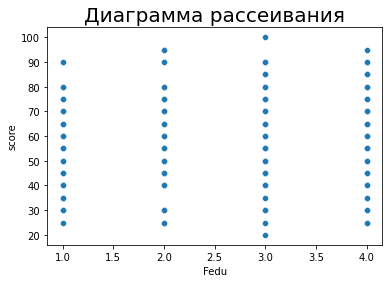


Коэффициент корреляции между Fedu и score: 0.14


1.0 :	кол-во записей - 65; процент от группы - 19.82%;
	среднее : 53.46, разница с общим : -4.13;
	медиана : 50.0, разница с общим : -5.0;
	отклонение : 15.08, разница с общим : -0.97;

Статистическая оценка влияния параметра 1.0 признака Fedu:

Т статистика = -2.43; P-value = 0.02;
таким образом на 5% уровне значимости: 1.0 ИМЕЕТ ВЛИЯНИЕ на score


2.0 :	кол-во записей - 94; процент от группы - 28.66%;
	среднее : 57.82, разница с общим : 0.23;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 15.74, разница с общим : -0.31;

Статистическая оценка влияния параметра 2.0 признака Fedu:

Т статистика = 0.16; P-value = 0.87;
таким образом на 5% уровне значимости: 2.0 НЕ влияет на score


3.0 :	кол-во записей - 89; процент от группы - 27.13%;
	среднее : 57.08, разница с общим : -0.51;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 16.51, разница с общим : 0.46;

Статистическая оценка влияния параметра 3.0 признака Fedu:

Т статис

In [30]:
primary_look(df, 'Fedu', 'score')

Выводы аналогичны, образования отца тоже имеет значение.

    N+

In [31]:
list_mask.append('Fedu')

----------------

# Mjob

Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

процент заполненных строк - 95.17%


,Mjob
other,115
services,90
teacher,51
at_home,49
health,30


Статистические параметры  Mjob


count       335
unique        5
top       other
freq        115
Name: Mjob, dtype: object

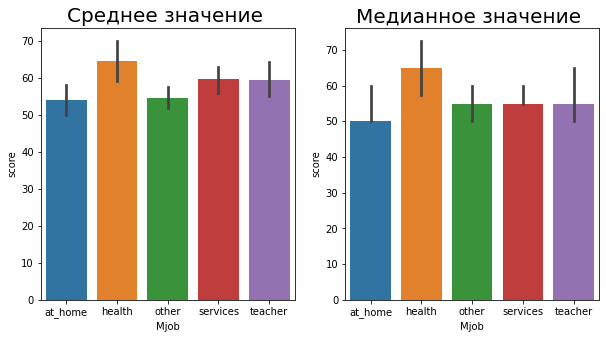

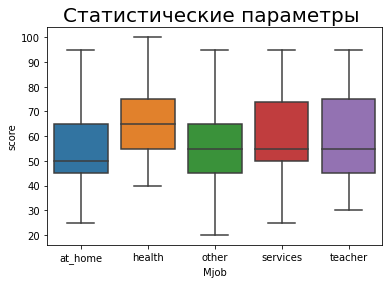

other :	кол-во записей - 115; процент от группы - 34.33%;
	среднее : 54.7, разница с общим : -2.85;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 15.34, разница с общим : -0.79;

Статистическая оценка влияния параметра other признака Mjob:

Т статистика = -2.41; P-value = 0.02;
таким образом на 5% уровне значимости: other ИМЕЕТ ВЛИЯНИЕ на score


services :	кол-во записей - 90; процент от группы - 26.87%;
	среднее : 59.61, разница с общим : 2.06;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 16.93, разница с общим : 0.8;

Статистическая оценка влияния параметра services признака Mjob:

Т статистика = 1.37; P-value = 0.17;
таким образом на 5% уровне значимости: services НЕ влияет на score


teacher :	кол-во записей - 51; процент от группы - 15.22%;
	среднее : 59.51, разница с общим : 1.96;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 16.8, разница с общим : 0.67;

Статистическая оценка влияния параметра teacher признака Mjob:

Т статистика = 0.91; P-value = 0.37

In [32]:
primary_look(df, 'Mjob', 'score')

Влияние на итоговую оценку у этого столбца есть, но с учетом того что в итоге надо определить фактор риска (т.е. тот признак который ведет к отрицательному отклонению от среднего), а в данном случае это other, которая включает в себя что угодно, нужно ли этим в итоге пользоваться?

    ?

In [33]:
list_mask.append('Mjob')

-----------------------

# Fjob

Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

процент заполненных строк - 90.91%


,Fjob
other,176
services,89
teacher,26
health,15
at_home,14


Статистические параметры  Fjob


count       320
unique        5
top       other
freq        176
Name: Fjob, dtype: object

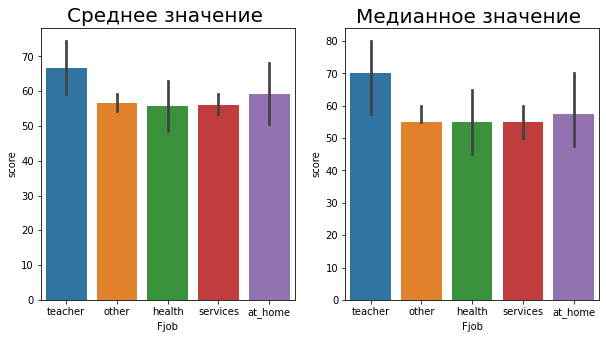

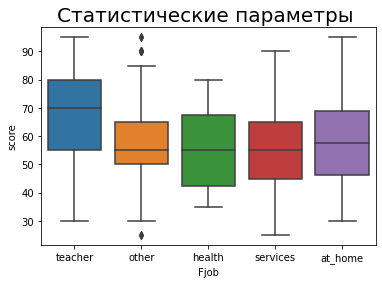

other :	кол-во записей - 176; процент от группы - 55.0%;
	среднее : 56.68, разница с общим : -0.73;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 15.27, разница с общим : -0.29;

Статистическая оценка влияния параметра other признака Fjob:

Т статистика = -0.92; P-value = 0.36;
таким образом на 5% уровне значимости: other НЕ влияет на score


services :	кол-во записей - 89; процент от группы - 27.81%;
	среднее : 56.12, разница с общим : -1.29;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 14.18, разница с общим : -1.38;

Статистическая оценка влияния параметра services признака Fjob:

Т статистика = -0.97; P-value = 0.33;
таким образом на 5% уровне значимости: services НЕ влияет на score


teacher :	кол-во записей - 26; процент от группы - 8.12%;
	среднее : 66.73, разница с общим : 9.32;
	медиана : 70.0, разница с общим : 15.0;
	отклонение : 19.08, разница с общим : 3.52;

Статистическая оценка влияния параметра teacher признака Fjob:

Т статистика = 2.64; P-value = 0.0

In [34]:
primary_look(df, 'Fjob', 'score', norm_num = 10)

Столбец не информативен, невозможно построить статистических выкладок на малых выборках. Единственный вывод - мало мужчин работают учителями, в здравоохранении или домохозяинами. От столбца стоит избавиться.
    
    S-

----------------

# reason

reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

процент заполненных строк - 95.74%


,reason
course,119
reputation,96
home,89
other,33


Статистические параметры  reason


count        337
unique         4
top       course
freq         119
Name: reason, dtype: object

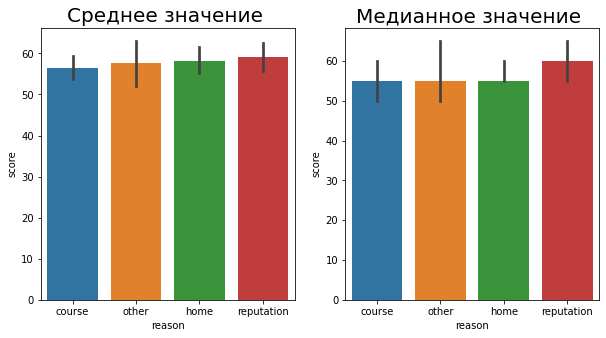

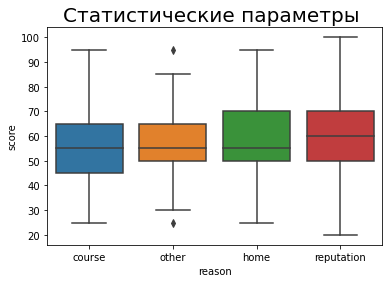

course :	кол-во записей - 119; процент от группы - 35.31%;
	среднее : 56.51, разница с общим : -1.26;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 16.24, разница с общим : -0.05;

Статистическая оценка влияния параметра course признака reason:

Т статистика = -1.05; P-value = 0.29;
таким образом на 5% уровне значимости: course НЕ влияет на score


reputation :	кол-во записей - 96; процент от группы - 28.49%;
	среднее : 59.11, разница с общим : 1.34;
	медиана : 60.0, разница с общим : 5.0;
	отклонение : 16.94, разница с общим : 0.65;

Статистическая оценка влияния параметра reputation признака reason:

Т статистика = 0.93; P-value = 0.35;
таким образом на 5% уровне значимости: reputation НЕ влияет на score


home :	кол-во записей - 89; процент от группы - 26.41%;
	среднее : 58.09, разница с общим : 0.32;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 15.55, разница с общим : -0.74;

Статистическая оценка влияния параметра home признака reason:

Т статистика = 0.22; P-val

In [35]:
primary_look(df, 'reason', 'score')

Влияние этого столбца на итоговую оценку не прослеживается.

    S-

-------

# guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

процент заполненных строк - 91.76%


,guardian
mother,225
father,78
other,20


Статистические параметры  guardian


count        323
unique         3
top       mother
freq         225
Name: guardian, dtype: object

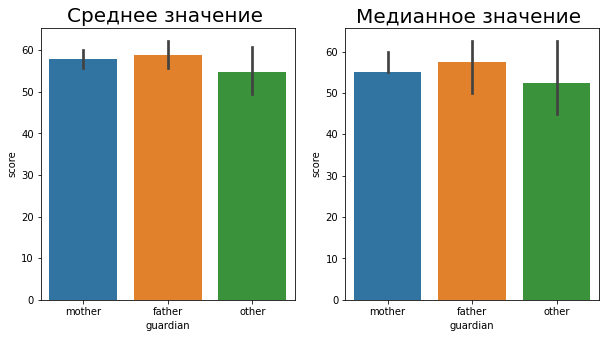

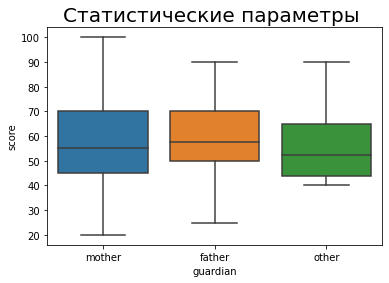

mother :	кол-во записей - 225; процент от группы - 69.66%;
	среднее : 57.98, разница с общим : -0.02;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 17.15, разница с общим : 0.59;

Статистическая оценка влияния параметра mother признака guardian:

Т статистика = -0.04; P-value = 0.97;
таким образом на 5% уровне значимости: mother НЕ влияет на score


father :	кол-во записей - 78; процент от группы - 24.15%;
	среднее : 58.91, разница с общим : 0.91;
	медиана : 57.5, разница с общим : 2.5;
	отклонение : 15.49, разница с общим : -1.07;

Статистическая оценка влияния параметра father признака guardian:

Т статистика = 0.58; P-value = 0.56;
таким образом на 5% уровне значимости: father НЕ влияет на score


other :	кол-во записей - 20; процент от группы - 6.19%;
	среднее : 54.75, разница с общим : -3.25;
	медиана : 52.5, разница с общим : -2.5;
	отклонение : 13.91, разница с общим : -2.65;

Статистическая оценка влияния параметра other признака guardian:

одна из выборок слишком мала 

In [36]:
primary_look(df, 'guardian', 'score')

Влияния нет. Параметр other мог бы иметь влияние, но выборка по нему слишком мала. Попробуем это проверить снизив необходимое кол-во в выборке до 10:

процент заполненных строк - 91.76%


,guardian
mother,225
father,78
other,20


Статистические параметры  guardian


count        323
unique         3
top       mother
freq         225
Name: guardian, dtype: object

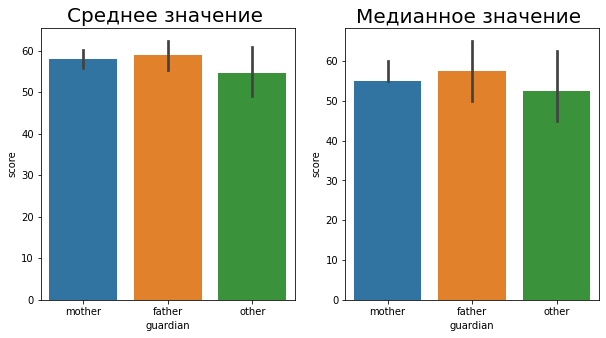

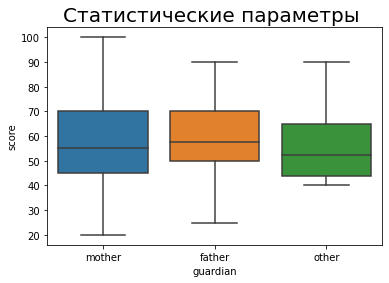

mother :	кол-во записей - 225; процент от группы - 69.66%;
	среднее : 57.98, разница с общим : -0.02;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 17.15, разница с общим : 0.59;

Статистическая оценка влияния параметра mother признака guardian:

Т статистика = -0.04; P-value = 0.97;
таким образом на 5% уровне значимости: mother НЕ влияет на score


father :	кол-во записей - 78; процент от группы - 24.15%;
	среднее : 58.91, разница с общим : 0.91;
	медиана : 57.5, разница с общим : 2.5;
	отклонение : 15.49, разница с общим : -1.07;

Статистическая оценка влияния параметра father признака guardian:

Т статистика = 0.58; P-value = 0.56;
таким образом на 5% уровне значимости: father НЕ влияет на score


other :	кол-во записей - 20; процент от группы - 6.19%;
	среднее : 54.75, разница с общим : -3.25;
	медиана : 52.5, разница с общим : -2.5;
	отклонение : 13.91, разница с общим : -2.65;

Статистическая оценка влияния параметра other признака guardian:

Т статистика = -1.07; P-value

In [37]:
primary_look(df, 'guardian', 'score', norm_num = 10)

В итоге и так влияние не просматривается, значит можно исключить этот столбец.

    S-

----------------------------

# traveltime

traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

процент заполненных строк - 93.47%


,traveltime
1.0,219
2.0,86
3.0,17
4.0,7


Статистические параметры  traveltime


count    329.000000
mean       1.428571
std        0.690907
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

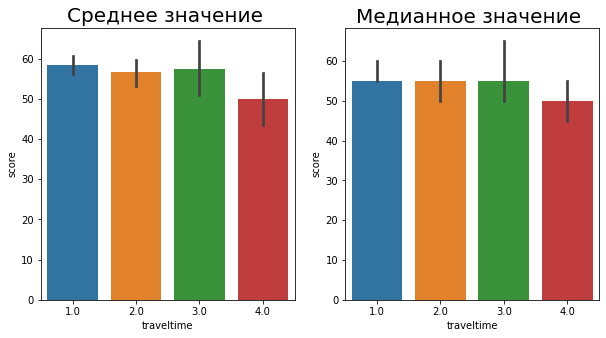

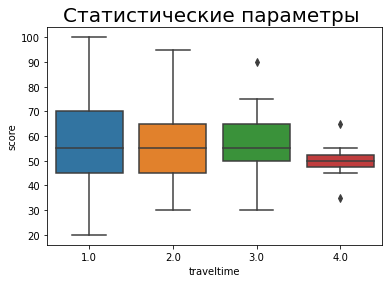

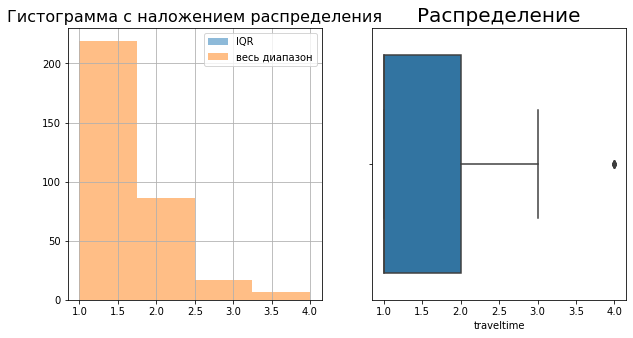

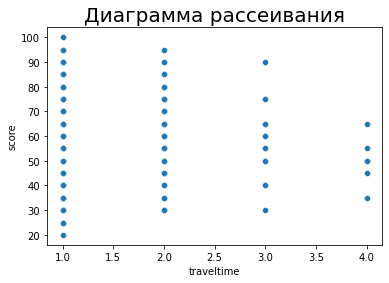


Коэффициент корреляции между traveltime и score: -0.08


1.0 :	кол-во записей - 219; процент от группы - 66.57%;
	среднее : 58.47, разница с общим : 0.73;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 16.73, разница с общим : 0.62;

Статистическая оценка влияния параметра 1.0 признака traveltime:

Т статистика = 1.22; P-value = 0.22;
таким образом на 5% уровне значимости: 1.0 НЕ влияет на score


2.0 :	кол-во записей - 86; процент от группы - 26.14%;
	среднее : 56.57, разница с общим : -1.17;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 15.15, разница с общим : -0.96;

Статистическая оценка влияния параметра 2.0 признака traveltime:

Т статистика = -0.81; P-value = 0.42;
таким образом на 5% уровне значимости: 2.0 НЕ влияет на score


3.0 :	кол-во записей - 17; процент от группы - 5.17%;
	среднее : 57.35, разница с общим : -0.39;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 14.7, разница с общим : -1.41;

Статистическая оценка влияния параметра 3.0 признака tr

In [38]:
primary_look(df, 'traveltime', 'score', norm_num = 10)

Для тех кто тратит в пути меньше часа, зависимости нет, а тех кто тратит больше, слишком мало для статистического анализа.

    N-

----------------

# studytime

studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

процент заполненных строк - 98.01%


,studytime
2.0,173
1.0,90
3.0,58
4.0,24


Статистические параметры  studytime


count    345.000000
mean       2.046377
std        0.840919
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

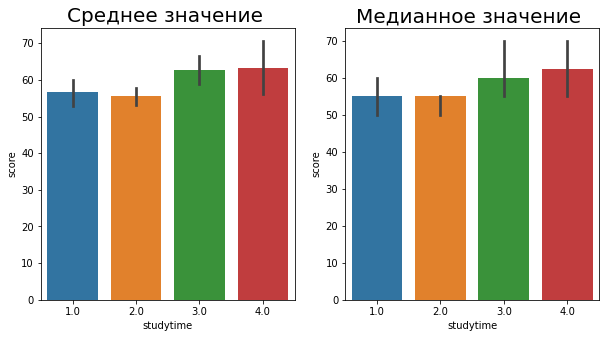

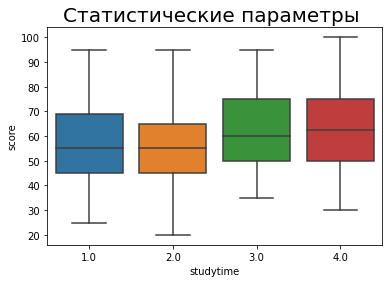

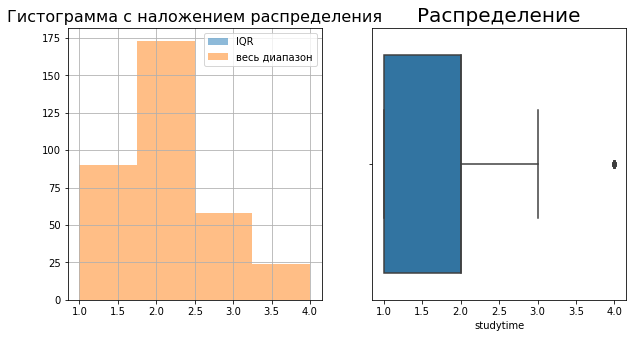

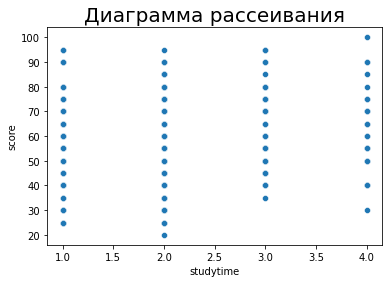


Коэффициент корреляции между studytime и score: 0.14


1.0 :	кол-во записей - 90; процент от группы - 26.09%;
	среднее : 56.61, разница с общим : -0.96;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 16.5, разница с общим : 0.34;

Статистическая оценка влияния параметра 1.0 признака studytime:

Т статистика = -0.64; P-value = 0.52;
таким образом на 5% уровне значимости: 1.0 НЕ влияет на score


2.0 :	кол-во записей - 173; процент от группы - 50.14%;
	среднее : 55.52, разница с общим : -2.05;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 15.63, разница с общим : -0.53;

Статистическая оценка влияния параметра 2.0 признака studytime:

Т статистика = -2.37; P-value = 0.02;
таким образом на 5% уровне значимости: 2.0 ИМЕЕТ ВЛИЯНИЕ на score


3.0 :	кол-во записей - 58; процент от группы - 16.81%;
	среднее : 62.76, разница с общим : 5.19;
	медиана : 60.0, разница с общим : 5.0;
	отклонение : 15.08, разница с общим : -1.08;

Статистическая оценка влияния параметра 3.0 признака 

In [39]:
primary_look(df, 'studytime', 'score')

Вполне логично, что влияние этого столбца на итоговую оценку за экзамен прослеживается.

    N+

In [40]:
list_mask.append('studytime')

---------

# failures

failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

процент заполненных строк - 94.32%


,failures
0.0,273
1.0,38
2.0,11
3.0,10


Статистические параметры  failures


count    332.000000
mean       0.271084
std        0.667779
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

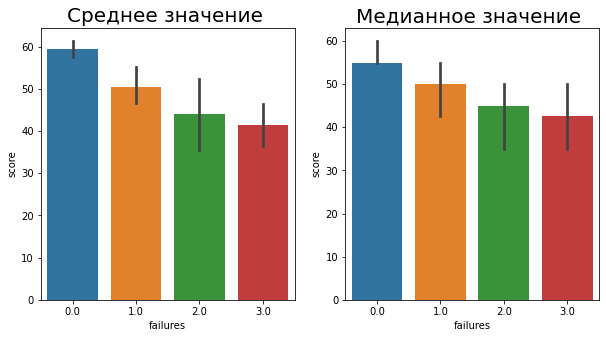

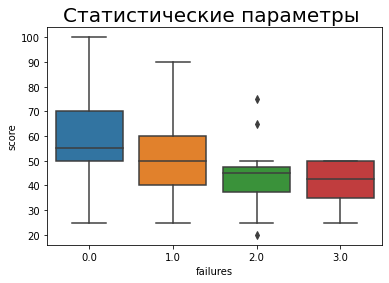

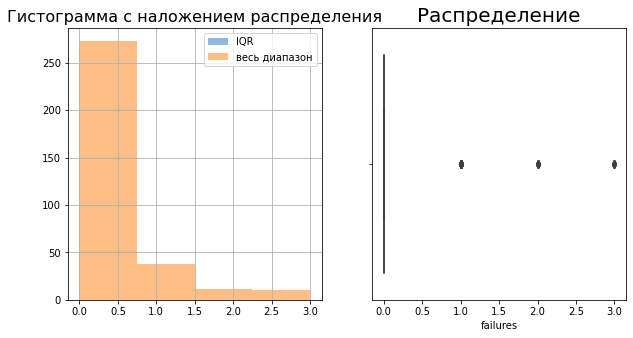

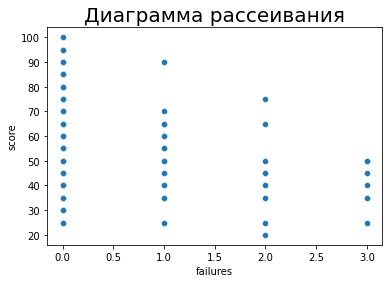


Коэффициент корреляции между failures и score: -0.29


0.0 :	кол-во записей - 273; процент от группы - 82.23%;
	среднее : 59.54, разница с общим : 2.09;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 15.99, разница с общим : -0.21;

Статистическая оценка влияния параметра 0.0 признака failures:

Т статистика = 5.86; P-value = 0.0;
таким образом на 5% уровне значимости: 0.0 ИМЕЕТ ВЛИЯНИЕ на score


1.0 :	кол-во записей - 38; процент от группы - 11.45%;
	среднее : 50.53, разница с общим : -6.92;
	медиана : 50.0, разница с общим : -5.0;
	отклонение : 13.29, разница с общим : -2.91;

Статистическая оценка влияния параметра 1.0 признака failures:

Т статистика = -3.32; P-value = 0.0;
таким образом на 5% уровне значимости: 1.0 ИМЕЕТ ВЛИЯНИЕ на score


2.0 :	кол-во записей - 11; процент от группы - 3.31%;
	среднее : 44.09, разница с общим : -13.36;
	медиана : 45.0, разница с общим : -10.0;
	отклонение : 15.78, разница с общим : -0.42;

Статистическая оценка влияния параметра 2.0 призн

In [41]:
primary_look(df, 'failures', 'score', norm_num = 10)

Хоть признаки 2 и 3 выглядят как выбросы в такой выборке, зависимость кол-ва неудач и оценки явно прослеживается. О чем дополнительно говорит коэффициент корреляции = -0.29.

    N+

In [42]:
list_mask.append('failures')

----------------------

# schoolsup

schoolsup — дополнительная образовательная поддержка (yes или no)

процент заполненных строк - 97.44%


,schoolsup
no,295
yes,48


Статистические параметры  schoolsup


count     343
unique      2
top        no
freq      295
Name: schoolsup, dtype: object

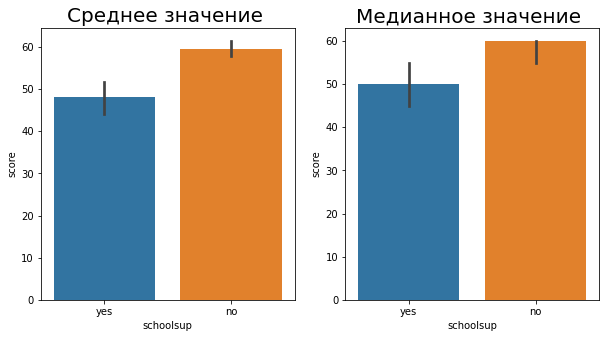

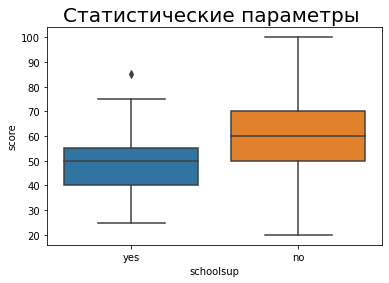

no :	кол-во записей - 295; процент от группы - 86.01%;
	среднее : 59.61, разница с общим : 1.62;
	медиана : 60.0, разница с общим : 5.0;
	отклонение : 16.01, разница с общим : -0.11;

Статистическая оценка влияния параметра no признака schoolsup:

Т статистика = 5.52; P-value = 0.0;
таким образом на 5% уровне значимости: no ИМЕЕТ ВЛИЯНИЕ на score


yes :	кол-во записей - 48; процент от группы - 13.99%;
	среднее : 48.02, разница с общим : -9.97;
	медиана : 50.0, разница с общим : -5.0;
	отклонение : 13.04, разница с общим : -3.08;

Статистическая оценка влияния параметра yes признака schoolsup:

Т статистика = -5.52; P-value = 0.0;
таким образом на 5% уровне значимости: yes ИМЕЕТ ВЛИЯНИЕ на score




In [43]:
primary_look(df, 'schoolsup', 'score')

Неожиданный результат: влияние есть, но дополнительная образовательная поддержка портит результат. Видимо, дополнительная образовательная поддержка оказывается тем, кто плохо учится. Тогда в нашем случае это не причина, а, скорее, следствие плохой успеваимости.

    ?

In [44]:
list_mask.append('schoolsup')

---------------------

# famsup

famsup — семейная образовательная поддержка (yes или no)

процент заполненных строк - 89.77%


,famsup
yes,196
no,120


Статистические параметры  famsup


count     316
unique      2
top       yes
freq      196
Name: famsup, dtype: object

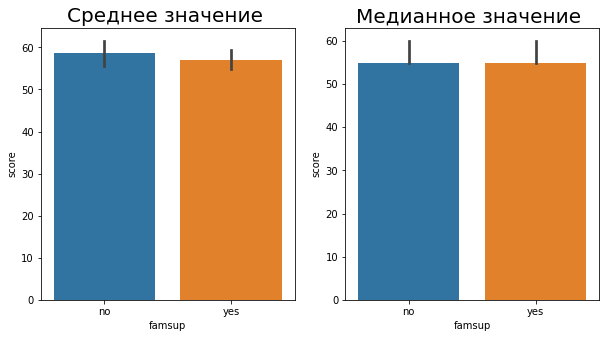

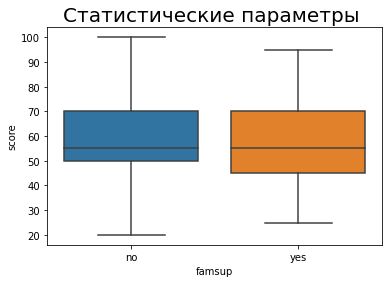

yes :	кол-во записей - 196; процент от группы - 62.03%;
	среднее : 56.99, разница с общим : -0.6;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 16.71, разница с общим : 0.18;

Статистическая оценка влияния параметра yes признака famsup:

Т статистика = -0.84; P-value = 0.4;
таким образом на 5% уровне значимости: yes НЕ влияет на score


no :	кол-во записей - 120; процент от группы - 37.97%;
	среднее : 58.58, разница с общим : 0.99;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 16.25, разница с общим : -0.28;

Статистическая оценка влияния параметра no признака famsup:

Т статистика = 0.84; P-value = 0.4;
таким образом на 5% уровне значимости: no НЕ влияет на score




In [45]:
primary_look(df, 'famsup', 'score')

А вот семейная образовательная поддержка ключевого влияния не имеет.

    S-

------------------

# paid

paid — дополнительные платные занятия по математике (yes или no)

процент заполненных строк - 89.77%


,paid
no,170
yes,146


Статистические параметры  paid


count     316
unique      2
top        no
freq      170
Name: paid, dtype: object

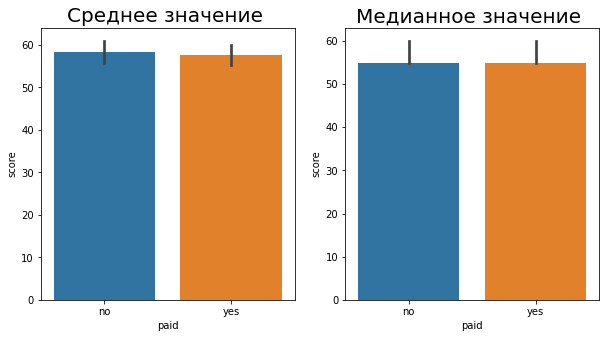

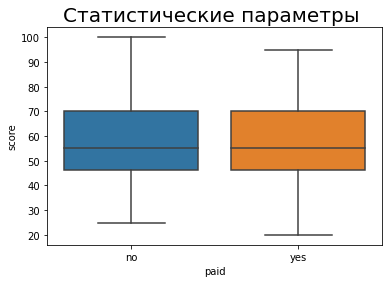

no :	кол-во записей - 170; процент от группы - 53.8%;
	среднее : 58.35, разница с общим : 0.33;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 16.91, разница с общим : 0.69;

Статистическая оценка влияния параметра no признака paid:

Т статистика = 0.39; P-value = 0.69;
таким образом на 5% уровне значимости: no НЕ влияет на score


yes :	кол-во записей - 146; процент от группы - 46.2%;
	среднее : 57.64, разница с общим : -0.38;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 15.43, разница с общим : -0.79;

Статистическая оценка влияния параметра yes признака paid:

Т статистика = -0.39; P-value = 0.69;
таким образом на 5% уровне значимости: yes НЕ влияет на score




In [46]:
primary_look(df, 'paid', 'score')

Если нет разницы, зачем платить больше?)

    S-

----------------------

# activities

activities — дополнительные внеучебные занятия (yes или no)

процент заполненных строк - 96.59%


,activities
yes,172
no,168


Статистические параметры  activities


count     340
unique      2
top       yes
freq      172
Name: activities, dtype: object

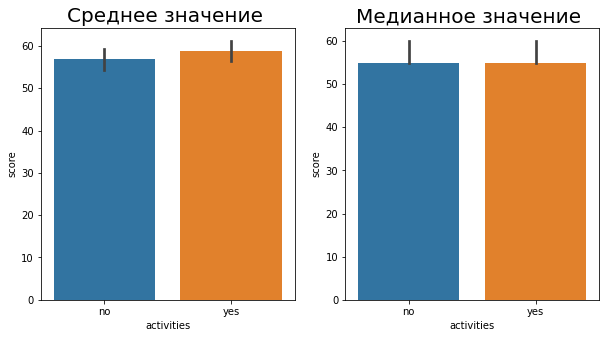

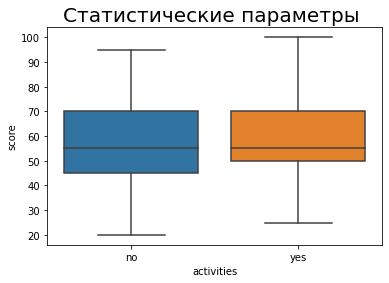

yes :	кол-во записей - 172; процент от группы - 50.59%;
	среднее : 58.81, разница с общим : 0.97;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 16.06, разница с общим : -0.32;

Статистическая оценка влияния параметра yes признака activities:

Т статистика = 1.1; P-value = 0.27;
таким образом на 5% уровне значимости: yes НЕ влияет на score


no :	кол-во записей - 168; процент от группы - 49.41%;
	среднее : 56.85, разница с общим : -0.99;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 16.68, разница с общим : 0.3;

Статистическая оценка влияния параметра no признака activities:

Т статистика = -1.1; P-value = 0.27;
таким образом на 5% уровне значимости: no НЕ влияет на score




In [47]:
primary_look(df, 'activities', 'score')

Этот признак не влияет на получение оценки

    S-

---------

# nursery

nursery — посещал детский сад (yes или no)

процент заполненных строк - 96.59%


,nursery
yes,272
no,68


Статистические параметры  nursery


count     340
unique      2
top       yes
freq      272
Name: nursery, dtype: object

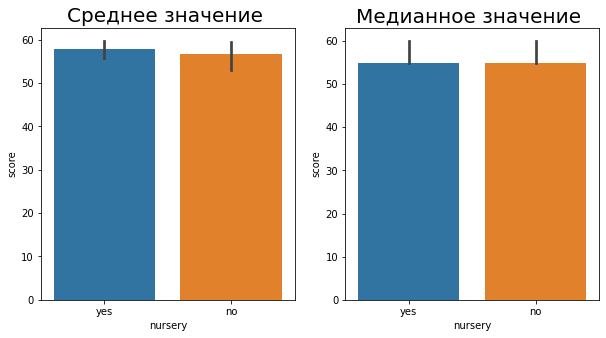

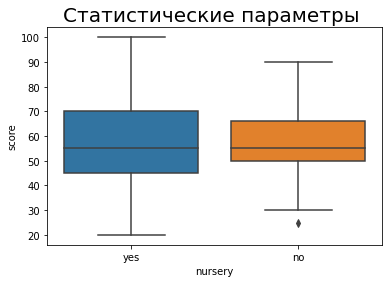

yes :	кол-во записей - 272; процент от группы - 80.0%;
	среднее : 57.83, разница с общим : 0.24;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 16.81, разница с общим : 0.55;

Статистическая оценка влияния параметра yes признака nursery:

Т статистика = 0.62; P-value = 0.54;
таким образом на 5% уровне значимости: yes НЕ влияет на score


no :	кол-во записей - 68; процент от группы - 20.0%;
	среднее : 56.62, разница с общим : -0.97;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 13.91, разница с общим : -2.35;

Статистическая оценка влияния параметра no признака nursery:

Т статистика = -0.62; P-value = 0.54;
таким образом на 5% уровне значимости: no НЕ влияет на score




In [48]:
primary_look(df, 'nursery', 'score')

Откидываем столбец за ненадобностью.

    S-

---

# higher

higher — хочет получить высшее образование (yes или no)

процент заполненных строк - 94.6%


,higher
yes,320
no,13


Статистические параметры  higher


count     333
unique      2
top       yes
freq      320
Name: higher, dtype: object

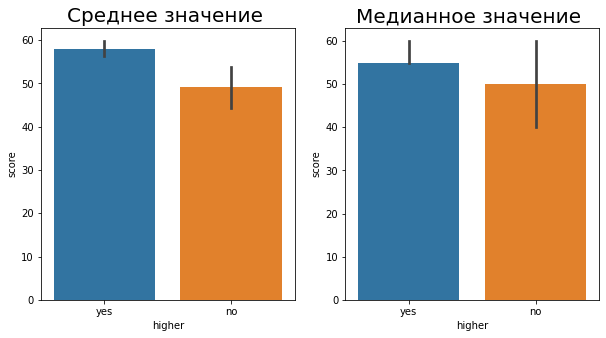

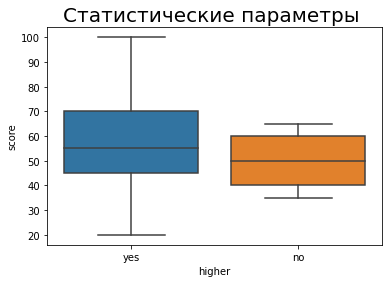

yes :	кол-во записей - 320; процент от группы - 96.1%;
	среднее : 58.08, разница с общим : 0.35;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 16.51, разница с общим : 0.14;

Статистическая оценка влияния параметра yes признака higher:

Т статистика = 3.16; P-value = 0.01;
таким образом на 5% уровне значимости: yes ИМЕЕТ ВЛИЯНИЕ на score


no :	кол-во записей - 13; процент от группы - 3.9%;
	среднее : 49.23, разница с общим : -8.5;
	медиана : 50.0, разница с общим : -5.0;
	отклонение : 9.54, разница с общим : -6.83;

Статистическая оценка влияния параметра no признака higher:

Т статистика = -3.16; P-value = 0.01;
таким образом на 5% уровне значимости: no ИМЕЕТ ВЛИЯНИЕ на score




In [49]:
primary_look(df, 'higher', 'score', norm_num = 10)

Выборка тех, кто не хочет получать высшее образование, слишком мала, хотя тенденция не желания учиться и плохих оценок достаточно очевидна. 
    
    Стоит ли оставить этот столбец? 

---------------------

# internet

internet — наличие интернета дома (yes или no)

процент заполненных строк - 91.76%


,internet
yes,274
no,49


Статистические параметры  internet


count     323
unique      2
top       yes
freq      274
Name: internet, dtype: object

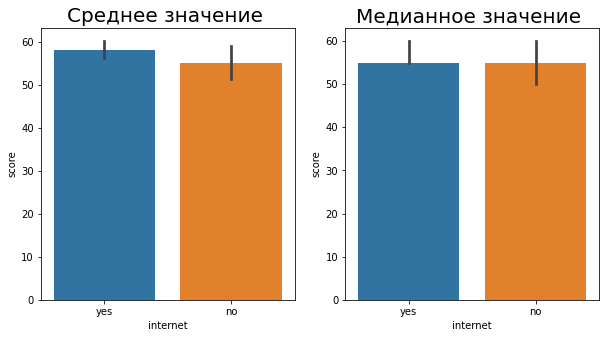

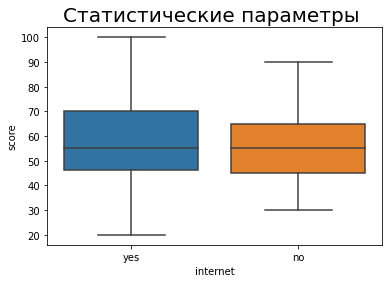

yes :	кол-во записей - 274; процент от группы - 84.83%;
	среднее : 58.16, разница с общим : 0.47;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 16.42, разница с общим : 0.27;

Статистическая оценка влияния параметра yes признака internet:

Т статистика = 1.34; P-value = 0.19;
таким образом на 5% уровне значимости: yes НЕ влияет на score


no :	кол-во записей - 49; процент от группы - 15.17%;
	среднее : 55.1, разница с общим : -2.59;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 14.42, разница с общим : -1.73;

Статистическая оценка влияния параметра no признака internet:

Т статистика = -1.34; P-value = 0.19;
таким образом на 5% уровне значимости: no НЕ влияет на score




In [50]:
primary_look(df, 'internet', 'score')

Отсутствие интернета не сильно сказывается на школьную успеваемость по математике, да и людей таких уже не много.

    S-

--------------------

# romantic

romantic — в романтических отношениях (yes или no)

процент заполненных строк - 91.76%


,romantic
no,219
yes,104


Статистические параметры  romantic


count     323
unique      2
top        no
freq      219
Name: romantic, dtype: object

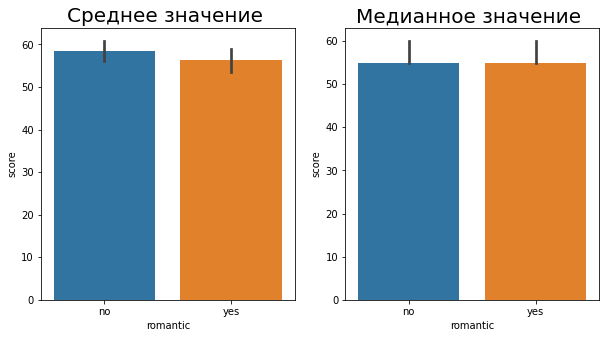

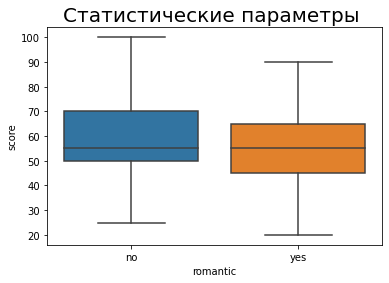

no :	кол-во записей - 219; процент от группы - 67.8%;
	среднее : 58.56, разница с общим : 0.7;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 17.06, разница с общим : 0.69;

Статистическая оценка влияния параметра no признака romantic:

Т статистика = 1.17; P-value = 0.24;
таким образом на 5% уровне значимости: no НЕ влияет на score


yes :	кол-во записей - 104; процент от группы - 32.2%;
	среднее : 56.39, разница с общим : -1.47;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 14.79, разница с общим : -1.58;

Статистическая оценка влияния параметра yes признака romantic:

Т статистика = -1.17; P-value = 0.24;
таким образом на 5% уровне значимости: yes НЕ влияет на score




In [51]:
primary_look(df, 'romantic', 'score')

Романтические отношения не сильно отвлекают наших учеников.

    S-

------------

# famrel

famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

процент заполненных строк - 93.18%


,famrel
4.0,163
5.0,88
3.0,56
2.0,14
1.0,6
-1.0,1


Статистические параметры  famrel


count    328.000000
mean       3.942073
std        0.921871
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

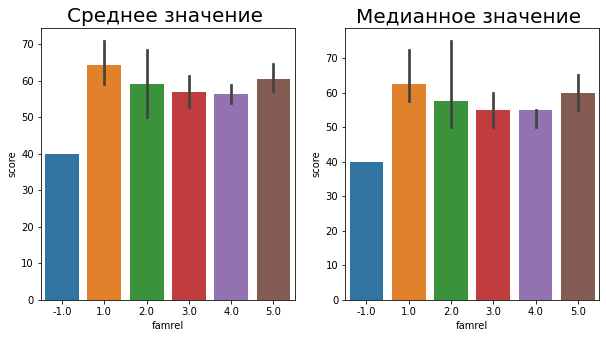

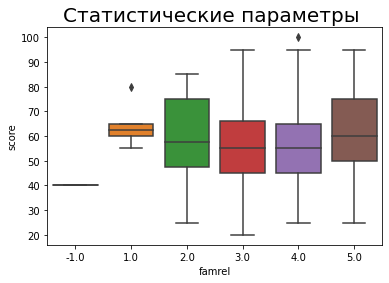

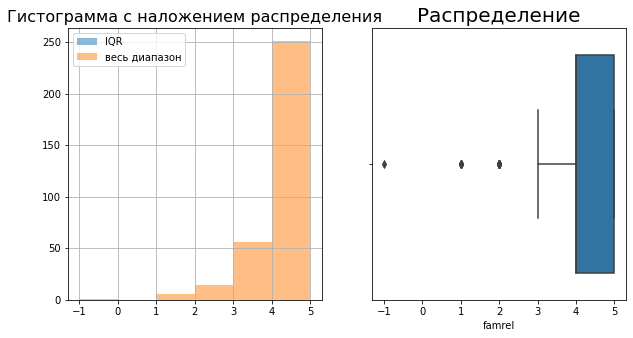

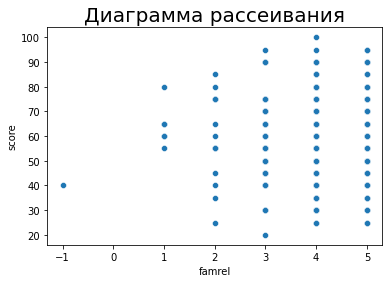


Коэффициент корреляции между famrel и score: 0.05


-1.0 :	кол-во записей - 1; процент от группы - 0.3%;
	среднее : 40.0, разница с общим : -17.76;
	медиана : 40.0, разница с общим : -15.0;
	отклонение : nan, разница с общим : nan;

Статистическая оценка влияния параметра -1.0 признака famrel:

одна из выборок слишком мала (< 30) невозможно оценить влияние.


1.0 :	кол-во записей - 6; процент от группы - 1.83%;
	среднее : 64.17, разница с общим : 6.41;
	медиана : 62.5, разница с общим : 7.5;
	отклонение : 8.61, разница с общим : -7.54;

Статистическая оценка влияния параметра 1.0 признака famrel:

одна из выборок слишком мала (< 30) невозможно оценить влияние.


2.0 :	кол-во записей - 14; процент от группы - 4.27%;
	среднее : 58.93, разница с общим : 1.17;
	медиана : 57.5, разница с общим : 2.5;
	отклонение : 18.1, разница с общим : 1.95;

Статистическая оценка влияния параметра 2.0 признака famrel:

одна из выборок слишком мала (< 30) невозможно оценить влияние.


3.0 :	кол-во записе

In [52]:
primary_look(df, 'famrel', 'score')

Присутствуют неправомерные значения. Надо от них избавиться:

In [53]:
df['famrel'] = df['famrel'].apply(lambda x: None if x < 1 else x)

Посмотрим на оценку столбца еще раз, заодно снизив планку оценки до 10 значений в выборке:

процент заполненных строк - 92.9%


,famrel
4.0,163
5.0,88
3.0,56
2.0,14
1.0,6


Статистические параметры  famrel


count    327.000000
mean       3.957187
std        0.881648
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

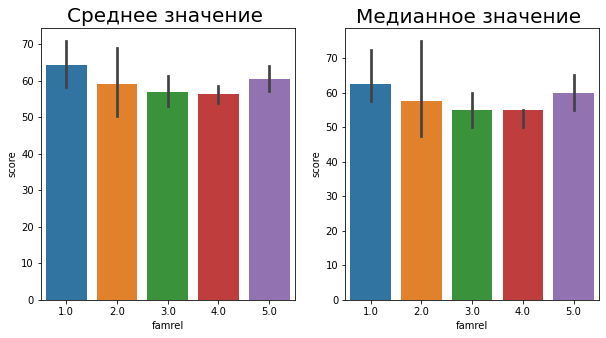

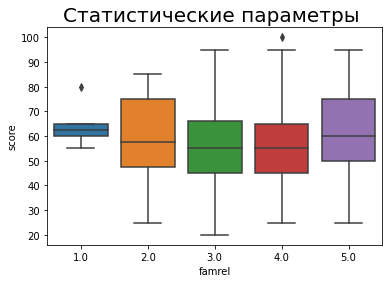

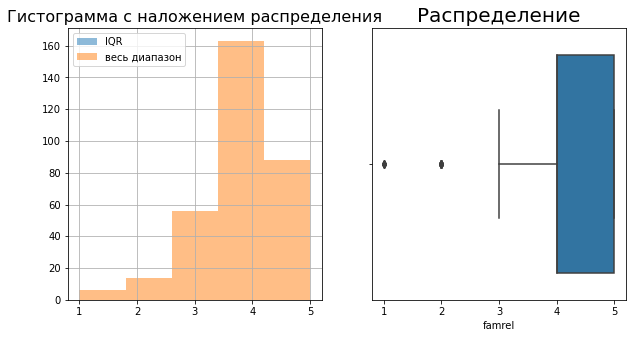

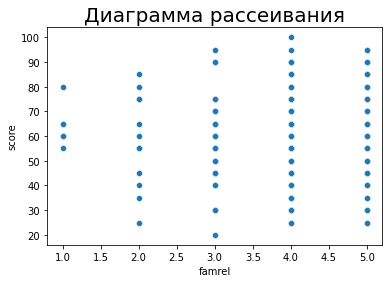


Коэффициент корреляции между famrel и score: 0.03


1.0 :	кол-во записей - 6; процент от группы - 1.83%;
	среднее : 64.17, разница с общим : 6.36;
	медиана : 62.5, разница с общим : 7.5;
	отклонение : 8.61, разница с общим : -7.53;

Статистическая оценка влияния параметра 1.0 признака famrel:

одна из выборок слишком мала (< 10) невозможно оценить влияние.


2.0 :	кол-во записей - 14; процент от группы - 4.28%;
	среднее : 58.93, разница с общим : 1.12;
	медиана : 57.5, разница с общим : 2.5;
	отклонение : 18.1, разница с общим : 1.96;

Статистическая оценка влияния параметра 2.0 признака famrel:

Т статистика = 0.24; P-value = 0.82;
таким образом на 5% уровне значимости: 2.0 НЕ влияет на score


3.0 :	кол-во записей - 56; процент от группы - 17.13%;
	среднее : 56.96, разница с общим : -0.85;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 15.89, разница с общим : -0.25;

Статистическая оценка влияния параметра 3.0 признака famrel:

Т статистика = -0.44; P-value = 0.66;
таким обр

In [54]:
primary_look(df, 'famrel', 'score', norm_num = 10)

Связи нет, но радует, что в семьях преимущественно хорошие и очень хорошие отношения.

    N-

---

# freetime

freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

процент заполненных строк - 97.73%


,freetime
3.0,132
4.0,102
2.0,59
5.0,35
1.0,16


Статистические параметры  freetime


count    344.000000
mean       3.235465
std        1.004258
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

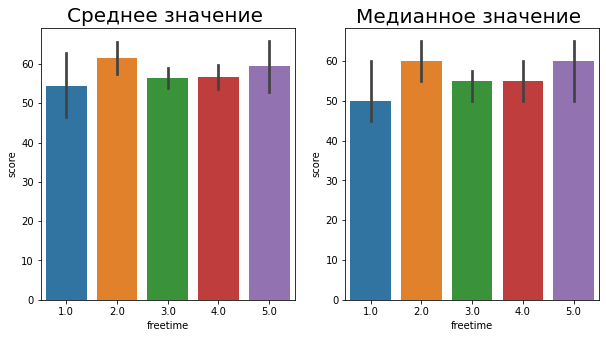

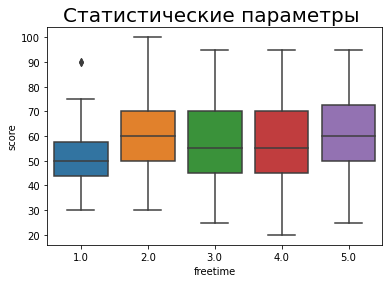

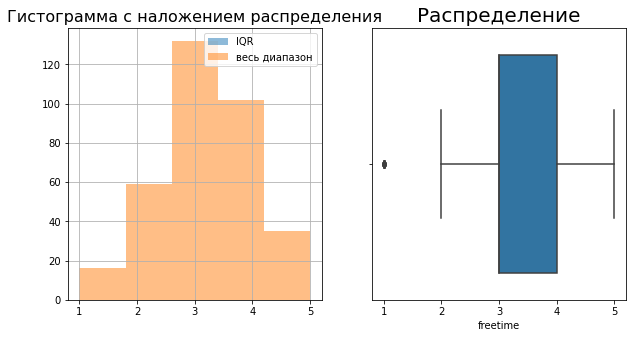

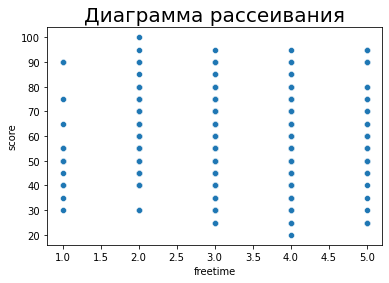


Коэффициент корреляции между freetime и score: -0.01


1.0 :	кол-во записей - 16; процент от группы - 4.65%;
	среднее : 54.38, разница с общим : -3.21;
	медиана : 50.0, разница с общим : -5.0;
	отклонение : 17.59, разница с общим : 1.38;

Статистическая оценка влияния параметра 1.0 признака freetime:

Т статистика = -0.75; P-value = 0.46;
таким образом на 5% уровне значимости: 1.0 НЕ влияет на score


2.0 :	кол-во записей - 59; процент от группы - 17.15%;
	среднее : 61.44, разница с общим : 3.85;
	медиана : 60.0, разница с общим : 5.0;
	отклонение : 15.31, разница с общим : -0.9;

Статистическая оценка влияния параметра 2.0 признака freetime:

Т статистика = 2.1; P-value = 0.04;
таким образом на 5% уровне значимости: 2.0 ИМЕЕТ ВЛИЯНИЕ на score


3.0 :	кол-во записей - 132; процент от группы - 38.37%;
	среднее : 56.36, разница с общим : -1.23;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 15.31, разница с общим : -0.9;

Статистическая оценка влияния параметра 3.0 признака freet

In [55]:
primary_look(df, 'freetime', 'score', norm_num = 10)

В одном из признаков обнаружилось влияние на итоговый результат. При этом корреляция ниже не куда: -0.01. Возможно этот результат говорит о том, что самый хороший результат у детей, которые имеют не так уж много свободного времени после школы, но при этом свободное время все же есть.

    N+

In [56]:
list_mask.append('freetime')

---

# goout

goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

процент заполненных строк - 98.3%


,goout
3.0,118
2.0,92
4.0,74
5.0,43
1.0,19


Статистические параметры  goout


count    346.000000
mean       3.086705
std        1.091998
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

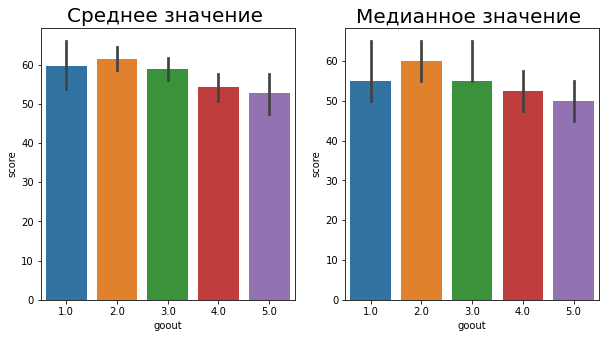

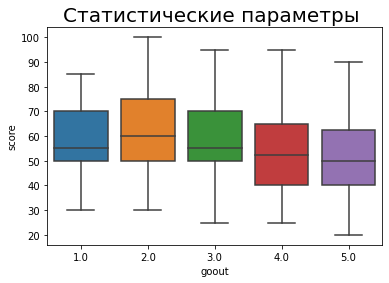

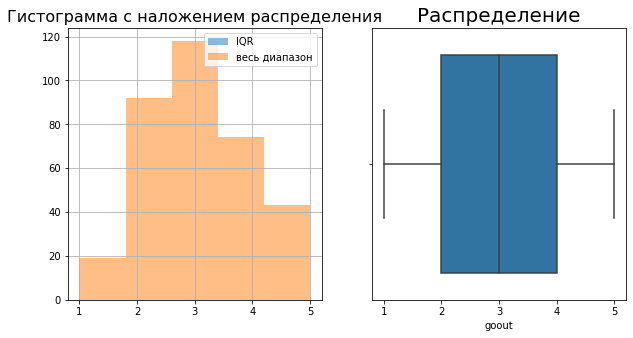

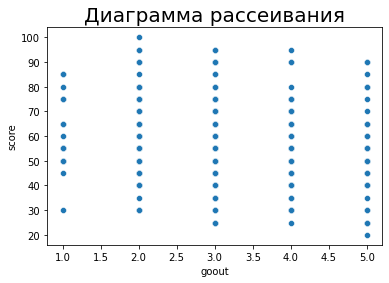


Коэффициент корреляции между goout и score: -0.18


1.0 :	кол-во записей - 19; процент от группы - 5.49%;
	среднее : 59.74, разница с общим : 1.88;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 14.67, разница с общим : -1.51;

Статистическая оценка влияния параметра 1.0 признака goout:

одна из выборок слишком мала (< 30) невозможно оценить влияние.


2.0 :	кол-во записей - 92; процент от группы - 26.59%;
	среднее : 61.47, разница с общим : 3.61;
	медиана : 60.0, разница с общим : 5.0;
	отклонение : 15.36, разница с общим : -0.82;

Статистическая оценка влияния параметра 2.0 признака goout:

Т статистика = 2.59; P-value = 0.01;
таким образом на 5% уровне значимости: 2.0 ИМЕЕТ ВЛИЯНИЕ на score


3.0 :	кол-во записей - 118; процент от группы - 34.1%;
	среднее : 58.9, разница с общим : 1.04;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 16.04, разница с общим : -0.14;

Статистическая оценка влияния параметра 3.0 признака goout:

Т статистика = 0.86; P-value = 0.39;
таким 

In [57]:
primary_look(df, 'goout', 'score')

Чем больше проводить свободного времени с друзьями, тем хуже оценки. Корреляция: -0.18

    N+

In [58]:
list_mask.append('goout')

------------

# health

health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

процент заполненных строк - 96.31%


,health
5.0,124
3.0,81
4.0,53
1.0,45
2.0,36


Статистические параметры  health


count    339.000000
mean       3.516224
std        1.412812
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

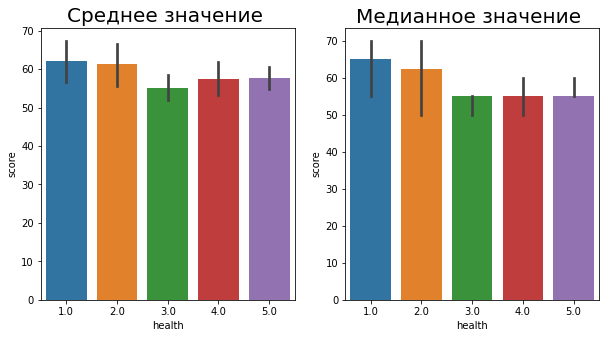

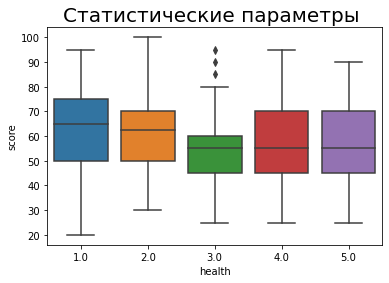

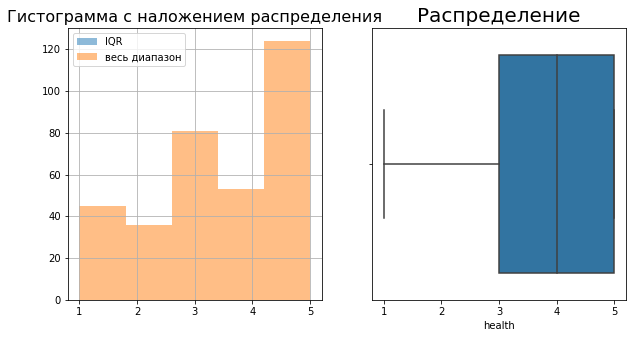

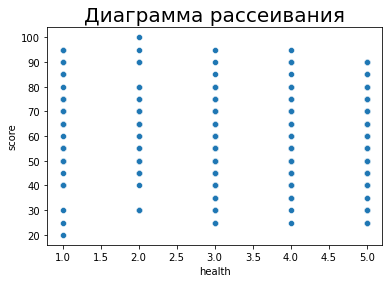


Коэффициент корреляции между health и score: -0.08


1.0 :	кол-во записей - 45; процент от группы - 13.27%;
	среднее : 62.0, разница с общим : 4.02;
	медиана : 65.0, разница с общим : 10.0;
	отклонение : 18.1, разница с общим : 1.8;

Статистическая оценка влияния параметра 1.0 признака health:

Т статистика = 1.62; P-value = 0.11;
таким образом на 5% уровне значимости: 1.0 НЕ влияет на score


2.0 :	кол-во записей - 36; процент от группы - 10.62%;
	среднее : 61.39, разница с общим : 3.41;
	медиана : 62.5, разница с общим : 7.5;
	отклонение : 17.75, разница с общим : 1.45;

Статистическая оценка влияния параметра 2.0 признака health:

Т статистика = 1.23; P-value = 0.23;
таким образом на 5% уровне значимости: 2.0 НЕ влияет на score


3.0 :	кол-во записей - 81; процент от группы - 23.89%;
	среднее : 55.0, разница с общим : -2.98;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 14.73, разница с общим : -1.57;

Статистическая оценка влияния параметра 3.0 признака health:

Т статисти

In [59]:
primary_look(df, 'health', 'score')

Пока не понятно как можно это трактовать. Корреляция низкая. Один из признаков показал зависимость с оценкой.

    N+

In [60]:
list_mask.append('health')

---

# absences

absences — количество пропущенных занятий

процент заполненных строк - 97.16%


,absences
0.0,74
2.0,60
4.0,52
6.0,30
8.0,20
10.0,17
14.0,12
12.0,12
16.0,7
3.0,7


Статистические параметры  absences


count    342.000000
mean       8.090643
std       24.704600
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

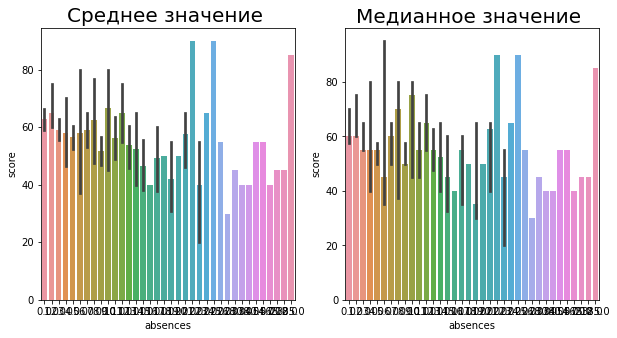

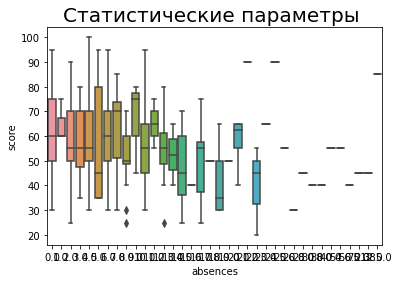

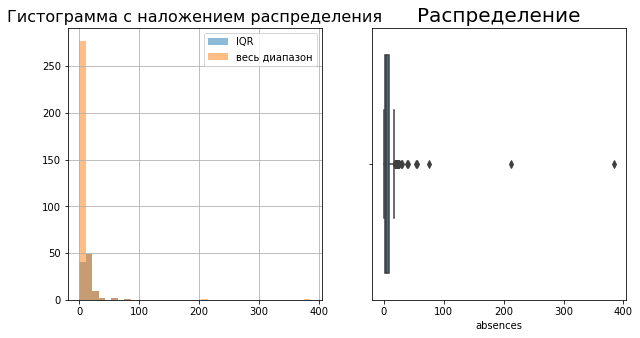

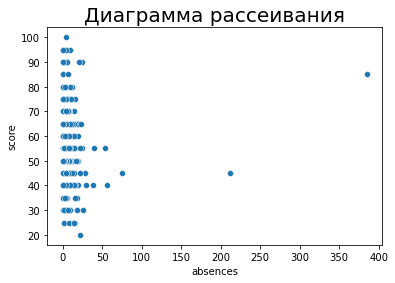


Коэффициент корреляции между absences и score: -0.01


0.0 :	кол-во записей - 74; процент от группы - 21.64%;
	среднее : 62.97, разница с общим : 5.46;
	медиана : 60.0, разница с общим : 5.0;
	отклонение : 15.48, разница с общим : -0.61;

Статистическая оценка влияния параметра 0.0 признака absences:

Т статистика = 3.4; P-value = 0.0;
таким образом на 5% уровне значимости: 0.0 ИМЕЕТ ВЛИЯНИЕ на score


2.0 :	кол-во записей - 60; процент от группы - 17.54%;
	среднее : 58.92, разница с общим : 1.41;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 14.79, разница с общим : -1.3;

Статистическая оценка влияния параметра 2.0 признака absences:

Т статистика = 0.79; P-value = 0.43;
таким образом на 5% уровне значимости: 2.0 НЕ влияет на score


3.0 :	кол-во записей - 7; процент от группы - 2.05%;
	среднее : 57.86, разница с общим : 0.35;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 17.53, разница с общим : 1.44;

Статистическая оценка влияния параметра 3.0 признака absences:



In [61]:
primary_look(df, 'absences', 'score')

Наблюдаем явные выбросы по этой величине. В таком варианте корреляции между пропусками и оценкой практически нет - коэффициент корреляции: -0.01. Для дальнейшей обработки нужно убрать выбросы, пользоваться доверительным интервалом нет смысла - распределение не похоже на нормальное. Поэтому исходя из того, что после 22 пропусков, все значения встречаются не более одного раза, ограничим кол-во пропусков 22:

In [62]:
df['absences'] = df['absences'].apply(lambda x: None if x > 22 else x)

процент заполненных строк - 93.47%


,absences
0.0,74
2.0,60
4.0,52
6.0,30
8.0,20
10.0,17
12.0,12
14.0,12
16.0,7
3.0,7


Статистические параметры  absences


count    329.000000
mean       5.322188
std        5.297793
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max       22.000000
Name: absences, dtype: float64

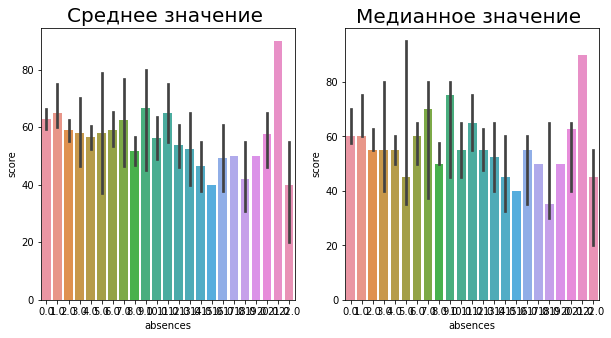

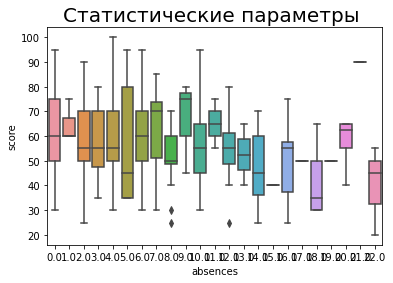

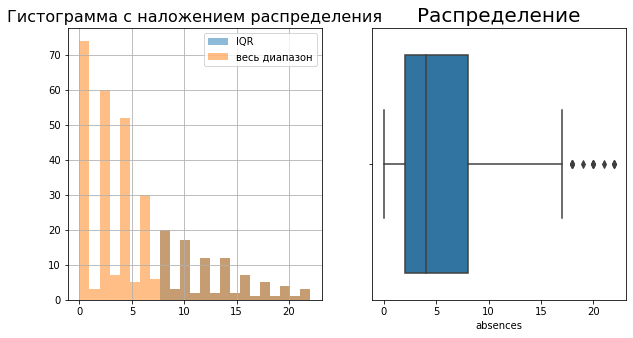

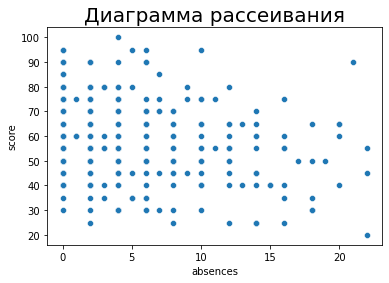


Коэффициент корреляции между absences и score: -0.24


0.0 :	кол-во записей - 74; процент от группы - 22.49%;
	среднее : 62.97, разница с общим : 5.28;
	медиана : 60.0, разница с общим : 5.0;
	отклонение : 15.48, разница с общим : -0.55;

Статистическая оценка влияния параметра 0.0 признака absences:

Т статистика = 3.31; P-value = 0.0;
таким образом на 5% уровне значимости: 0.0 ИМЕЕТ ВЛИЯНИЕ на score


2.0 :	кол-во записей - 60; процент от группы - 18.24%;
	среднее : 58.92, разница с общим : 1.23;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 14.79, разница с общим : -1.24;

Статистическая оценка влияния параметра 2.0 признака absences:

Т статистика = 0.7; P-value = 0.49;
таким образом на 5% уровне значимости: 2.0 НЕ влияет на score


3.0 :	кол-во записей - 7; процент от группы - 2.13%;
	среднее : 57.86, разница с общим : 0.17;
	медиана : 55.0, разница с общим : 0.0;
	отклонение : 17.53, разница с общим : 1.5;

Статистическая оценка влияния параметра 3.0 признака absences:



In [63]:
primary_look(df, 'absences', 'score')

В таком случае коеффициент корреляции уже -0.24. Так что связь между прогулами и оценкой существует.

    N+

In [64]:
list_mask.append('absences')

------

# Корреляция

создадим новый датафрейм для модели, включая нужные столбцы:

In [65]:
df_for_model = df[list_mask]

посмотрим на зависимости числовых параметров

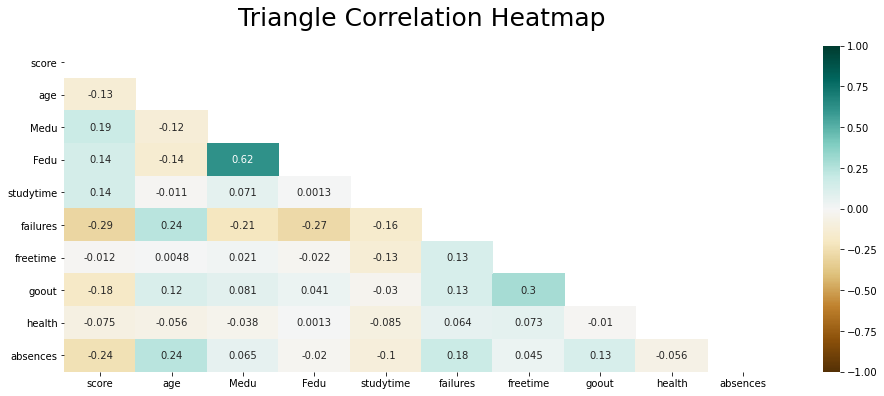

In [66]:
plt.figure(figsize=(16, 6)) 

# Определите маску, чтобы установить значения в верхнем треугольнике на True 
mask = np.triu(np.ones_like(df_for_model.corr(), dtype=bool)) 
sns.heatmap(df_for_model.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
plt.title('Triangle Correlation Heatmap', fontsize = 25, pad=20);


---

# Альтернативный способ проверки зависимостей

проверим зависимости оценок от номинативных столбцов с помощью множественных гипотез:

In [68]:
for col in [ 'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
            'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(df, col, 'score')

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки schoolsup


In [69]:
list_mask

['score',
 'age',
 'address',
 'Medu',
 'Fedu',
 'Mjob',
 'studytime',
 'failures',
 'schoolsup',
 'freetime',
 'goout',
 'health',
 'absences']

разница только в "Fjob", но функция get_stat_dif не учитывает кол-во выборки, поэтому не станем включать этот столбец в итоговый датафрейм для модели.

----

# Проверка зависимостей получения оценки 0

Возьмем выборку с оценкой 0 как отдельное множество с не стандартным результатом (выходящим за пределы нормального распределения величины оценки. Тогда если распределения признаков внутри столбцов будет отличатся от подобного распределения в столбцах выборки, где оценки распределены нормально, эти признаки и будут значимыми для выходящего из ряда получения 0.

In [70]:
df_0

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


In [71]:
for col in df.columns:
    prop_diff(df[col], df_0[col], info = False)

для at_home из Mjob ОБНАРУЖИЛИСЬ значимые изменения:
общее: 0.146	проверяемое: 0.257

для no из schoolsup ОБНАРУЖИЛИСЬ значимые изменения:
общее: 0.86	проверяемое: 0.973

для no из paid ОБНАРУЖИЛИСЬ значимые изменения:
общее: 0.538	проверяемое: 0.794

для yes из romantic ОБНАРУЖИЛИСЬ значимые изменения:
общее: 0.322	проверяемое: 0.543

для 3.0 из freetime ОБНАРУЖИЛИСЬ значимые изменения:
общее: 0.384	проверяемое: 0.556

для 0.0 из absences ОБНАРУЖИЛИСЬ значимые изменения:
общее: 0.225	проверяемое: 1.0



ВЫВОД: Таким образом факторы риска для получения 0 на экзамене: Мать не работает, дополнительная учебная поддержка отсутствует, платное дополнительное образование отсутствует, нахождение в романтических отношениях, среднее кол-во свободного времени и отсутствие пропусков.

----------------------

# Итог

Итак, в результате EDA для анализа влияния различных признаков на экзаменационную оценку по матеиатике были получены следующие выводы:

В данных достаточно мало пустых и выбросных значений. незаполненные оценки были удалены, только несколько столбцов имели 
выбросы или неправильные значения, только в столбце higher соотношение распределений очень сдвинуто, что позволяет сделать вывод о том, что данные достаточно чистые.
Зависимость того что оценка ухудшается, если ученик имеет дополнительную поддержку образования в школе, скорее является следствием плохой успеваимости, а не причиной плохой оценки.
Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это 'score',
 'age',
 'address',
 'Medu',
 'Fedu',
 'Mjob',
 'studytime',
 'failures',
 'schoolsup',
 'freetime',
 'goout',
 'health',
 'absences'.
 Отдельно рассмотрен вариант с получением оценки 0, т.к. эта оценка портит нормальное распределение экзаменационных оценок.

In [72]:
df_for_model

,score,age,address,Medu,Fedu,Mjob,studytime,failures,schoolsup,freetime,goout,health,absences
0,30.0,18,U,4.0,4.0,at_home,2.0,0.0,yes,3.0,4.0,3.0,6.0
1,30.0,17,U,1.0,1.0,at_home,2.0,0.0,no,3.0,3.0,3.0,4.0
2,50.0,15,U,1.0,1.0,at_home,2.0,3.0,yes,3.0,2.0,3.0,10.0
3,75.0,15,U,4.0,2.0,health,3.0,0.0,no,2.0,2.0,5.0,2.0
4,50.0,16,U,3.0,3.0,other,2.0,0.0,no,3.0,2.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,45.0,20,U,2.0,2.0,services,2.0,2.0,no,5.0,4.0,4.0,NaN
348,80.0,17,U,3.0,1.0,services,1.0,0.0,no,4.0,5.0,2.0,3.0
349,35.0,21,R,1.0,1.0,other,1.0,3.0,NaN,5.0,3.0,3.0,3.0
350,50.0,18,R,3.0,2.0,services,1.0,0.0,no,4.0,1.0,5.0,0.0


-------------